In [1]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np

phase3_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 3")
with open('phase3_collection.pkl','wb') as file:
    pickle.dump(phase3_collection, file)



In [2]:
with open('phase3_collection.pkl', 'rb') as file:
    phase3_collection = pickle.load(file)


In [3]:
p3d1_1_1 = phase3_collection.get_by_name('20230809_103121_1_merged.rec')
#p3d1_1_2 was only half as long so we will not do ephys data analysis on it 
p3d1_1_4 = phase3_collection.get_by_name('20230809_143303_1_merged.rec')

p3d2_1_1 = phase3_collection.get_by_name('20230810_101534_1_merged.rec')
p3d2_1_2 = phase3_collection.get_by_name('20230810_120856_1_merged.rec')
p3d2_1_4 = phase3_collection.get_by_name('20230810_140909_1_merged.rec')

p3d3_1_1 = phase3_collection.get_by_name('20230811_101635_1_merged.rec')
p3d3_1_2 = phase3_collection.get_by_name('20230811_120331_merged.rec')
p3d3_1_4 = phase3_collection.get_by_name('20230811_154219_1_merged.rec')


p3d1_1_1.subject = '1.1'
p3d1_1_4.subject = '1.4'
p3d2_1_1.subject = '1.1'
p3d2_1_2.subject = '1.2'
p3d2_1_4.subject = '1.4'
p3d3_1_1.subject = '1.1'
p3d3_1_2.subject = '1.2'
p3d3_1_4.subject = '1.4'

min_iti = 2

In [4]:
p3d1_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_103121_1_merged.rec\\20230809_103121_1.1_1t1bL_p3d1.xlsx")

p3d1_1_1_df = p3d1_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

last10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] > 1939]
first10min_p3d1_1_1_df = p3d1_1_1_df[p3d1_1_1_df['Start (s)'] < 601]
familiarization_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] < 1258) & (p3d1_1_1_df['Start (s)'] > 675)]
ITI_p3d1_1_1_df = p3d1_1_1_df[(p3d1_1_1_df['Start (s)'] > 1271) & (p3d1_1_1_df['Start (s)'] < 1860)]

novel_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
fam_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
empty_p3d1_1_1_array = boris.get_behavior_bouts(last10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#cup3_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_1_array = boris.get_behavior_bouts(first10min_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famempty_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
famfam_p3d1_1_1_array = boris.get_behavior_bouts(familiarization_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

ITIcup3_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1],['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_1_array = boris.get_behavior_bouts(ITI_p3d1_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

In [5]:
#FOR BEHAVIOR ANALYSIS ONLY

p3d1_1_2_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\fucked\\20230809_120416_1_merged.rec\\20230809 120416 1.1.xlsx")
p3d1_1_2_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\fucked\\20230809_120416_1_merged.rec\\20230809 120416 1.2.xlsx")

p3d1_1_2_1_df = p3d1_1_2_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]

last10min_p3d1_1_2_df = p3d1_1_2_2_df[p3d1_1_2_2_df['Start (s)'] > 1376]
first10min_p3d1_1_2_df = p3d1_1_2_1_df
familiarization_p3d1_1_2_df = p3d1_1_2_2_df[(p3d1_1_2_2_df['Start (s)'] < 646) & (p3d1_1_2_2_df['Start (s)'] > 44)]
ITI_p3d1_1_2_df = p3d1_1_2_2_df[(p3d1_1_2_2_df['Start (s)'] > 666) & (p3d1_1_2_2_df['Start (s)'] < 1263)]

novel_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
fam_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
empty_p3d1_1_2_array = boris.get_behavior_bouts(last10min_p3d1_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_2_array = boris.get_behavior_bouts(first10min_p3d1_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d1_1_2_array = boris.get_behavior_bouts(familiarization_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d1_1_2_array = boris.get_behavior_bouts(familiarization_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d1_1_2_array = boris.get_behavior_bouts(ITI_p3d1_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_2_array = boris.get_behavior_bouts(ITI_p3d1_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

In [6]:
p3d1_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230809_143303_1_merged.rec\\20230809_143303_1.4_3t3bL_p3d1.xlsx")

p3d1_1_4_df = p3d1_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] > 1920]
first10min_p3d1_1_4_df = p3d1_1_4_df[p3d1_1_4_df['Start (s)'] < 602]
familiarization_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] < 1234) & (p3d1_1_4_df['Start (s)'] > 629)]
ITI_p3d1_1_4_df = p3d1_1_4_df[(p3d1_1_4_df['Start (s)'] > 1260) & (p3d1_1_4_df['Start (s)'] < 1856)]
novel_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_p3d1_1_4_array = boris.get_behavior_bouts(last10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup3_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d1_1_4_array = boris.get_behavior_bouts(first10min_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famcup3_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
famfam_p3d1_1_4_array = boris.get_behavior_bouts(familiarization_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIcup3_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3','sniff cup 1', 'chew cup 1','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIfamcup_p3d1_1_4_array = boris.get_behavior_bouts(ITI_p3d1_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

In [7]:
p3d2_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_101534_1_merged.rec\\20230810_101534_1.1_p3d2.xlsx")

p3d2_1_1_df = p3d2_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] > 1926]
first10min_p3d2_1_1_df = p3d2_1_1_df[p3d2_1_1_df['Start (s)'] < 600]
familiarization_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] < 1216) & (p3d2_1_1_df['Start (s)'] > 612)]
ITI_p3d2_1_1_df = p3d2_1_1_df[(p3d2_1_1_df['Start (s)'] > 1222) & (p3d2_1_1_df['Start (s)'] < 1821)]

novel_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
fam_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
empty_p3d2_1_1_array = boris.get_behavior_bouts(last10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_1_array = boris.get_behavior_bouts(first10min_p3d2_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_1_array = boris.get_behavior_bouts(familiarization_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_1_array = boris.get_behavior_bouts(ITI_p3d2_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

In [8]:
p3d2_1_2_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_120856_1_merged.rec\\20230810_120856_1.2_p3d2.xlsx")

p3d2_1_2_df = p3d2_1_2_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] > 2049]
first10min_p3d2_1_2_df = p3d2_1_2_df[p3d2_1_2_df['Start (s)'] < 723]
familiarization_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] < 1351) & (p3d2_1_2_df['Start (s)'] > 734)]
ITI_p3d2_1_2_df = p3d2_1_2_df[(p3d2_1_2_df['Start (s)'] > 1373) & (p3d2_1_2_df['Start (s)'] < 1950)]

novel_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_p3d2_1_2_array = boris.get_behavior_bouts(last10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_2_array = boris.get_behavior_bouts(first10min_p3d2_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_2_array = boris.get_behavior_bouts(familiarization_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_2_array = boris.get_behavior_bouts(ITI_p3d2_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)


In [9]:
p3d2_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230810_140909_1_merged.rec\\20230810_140909_1.4_p3d2.xlsx")

p3d2_1_4_df = p3d2_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] > 1912]
first10min_p3d2_1_4_df = p3d2_1_4_df[p3d2_1_4_df['Start (s)'] < 621]
familiarization_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] < 1221) & (p3d2_1_4_df['Start (s)'] > 635)]
ITI_p3d2_1_4_df = p3d2_1_4_df[(p3d2_1_4_df['Start (s)'] > 1234) & (p3d2_1_4_df['Start (s)'] < 1836)]

novel_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
fam_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
cagemate_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
empty_p3d2_1_4_array = boris.get_behavior_bouts(last10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

#cup3_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d2_1_4_array = boris.get_behavior_bouts(first10min_p3d2_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d2_1_4_array = boris.get_behavior_bouts(familiarization_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d2_1_4_array = boris.get_behavior_bouts(ITI_p3d2_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

In [10]:
p3d3_1_1_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_101635_1_merged.rec\\1.1_p3d3.xlsx")

p3d3_1_1_df = p3d3_1_1_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] > 1903]
first10min_1_1_df = p3d3_1_1_df[p3d3_1_1_df['Start (s)'] < 601]
familiarization_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] < 1208) & (p3d3_1_1_df['Start (s)'] > 608)]
ITI_1_1_df = p3d3_1_1_df[(p3d3_1_1_df['Start (s)'] > 1221) & (p3d3_1_1_df['Start (s)'] < 1809)]
novel_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
fam_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cagemate_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
empty_1_1_array = boris.get_behavior_bouts(last10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
#cup3_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_1_1_array = boris.get_behavior_bouts(first10min_1_1_df, [1.1], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famcup3_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_1_1_array = boris.get_behavior_bouts(familiarization_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
ITIcup3_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 3', 'chew cup 3', 'sniff cup 1', 'chew cup 1','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_1_1_array = boris.get_behavior_bouts(ITI_1_1_df, [1.1], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

In [11]:
# 2572320.85 ms is the length of the recording of p3d3_1_2 
# media duration of second vid is 862200 ms
# diff in ms: 1710120.85
#this is the constant i add to every value in the array

p3d3_1_2_df1 = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_1.xlsx")
p3d3_1_2_df1 = p3d3_1_2_df1[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
first10min_1_2_df = p3d3_1_2_df1[p3d3_1_2_df1['Start (s)'] < 611]
familiarization_1_2_df = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] < 1230) & (p3d3_1_2_df1['Start (s)'] > 628)]
ITI_1_2_df1 = p3d3_1_2_df1[(p3d3_1_2_df1['Start (s)'] > 1244)]

#cup3_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
#cup2_p3d3_1_2_array = boris.get_behavior_bouts(first10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
famfam_p3d3_1_2_array = boris.get_behavior_bouts(familiarization_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
ITIcup3_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array1 = boris.get_behavior_bouts(ITI_1_2_df1, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

p3d3_1_2_df2 = pd.read_excel("D:\\social_ephys_pilot2_cum\proc\Phase 3\\20230811_120331_merged.rec\\20230811_120331_1.2_p3d3_2.xlsx")
p3d3_1_2_df2 = p3d3_1_2_df2[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_1_2_df = p3d3_1_2_df2[p3d3_1_2_df2['Start (s)'] > 259]
ITI_1_2_df2 = p3d3_1_2_df2[(p3d3_1_2_df2['Start (s)'] < 134)]

ITIcup3_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 3', 'chew cup 3', 'sniff cup 4', 'chew cup 4','sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_2_array2 = boris.get_behavior_bouts(ITI_1_2_df2, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)

novel_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
fam_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
cagemate_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
empty_p3d3_1_2_array = boris.get_behavior_bouts(last10min_1_2_df, [1.2], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)

ITIcup3_p3d3_1_2_array2 = ITIcup3_p3d3_1_2_array2 + 1710120.85
ITIfamcup_p3d3_1_2_array2 = ITIfamcup_p3d3_1_2_array2 + 1710120.85

novel_p3d3_1_2_array = novel_p3d3_1_2_array + 1710120.85
fam_p3d3_1_2_array = fam_p3d3_1_2_array + 1710120.85
cagemate_p3d3_1_2_array = cagemate_p3d3_1_2_array + 1710120.85
empty_p3d3_1_2_array = empty_p3d3_1_2_array + 1710120.85

ITIcup3_p3d3_1_2_array = np.concatenate([ITIcup3_p3d3_1_2_array1, ITIcup3_p3d3_1_2_array2])
ITIfamcup_p3d3_1_2_array = np.concatenate([ITIfamcup_p3d3_1_2_array1, ITIfamcup_p3d3_1_2_array2])



In [12]:
p3d3_1_4_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 3\\20230811_154219_1_merged.rec\\20230811_154219_1.4_3t3bL_p3d3.xlsx")

p3d3_1_4_df = p3d3_1_4_df[['Total duration', 'Subject','Behavior','Start (s)','Stop (s)']]
last10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] > 1910]
first10min_p3d3_1_4_df = p3d3_1_4_df[p3d3_1_4_df['Start (s)'] < 605]
familiarization_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] < 1201) & (p3d3_1_4_df['Start (s)'] > 625)]
ITI_p3d3_1_4_df = p3d3_1_4_df[(p3d3_1_4_df['Start (s)'] > 1211) & (p3d3_1_4_df['Start (s)'] < 1837)]

novel_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1'], min_iti, min_bout = 0.5)
fam_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)
cagemate_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
empty_p3d3_1_4_array = boris.get_behavior_bouts(last10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)

#cup3_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
#cup4_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
cup1_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 1', 'chew cup 1', 'sniff cup 2', 'chew cup 2','sniff cup 3', 'chew cup 3','sniff cup 4', 'chew cup 4'], min_iti, min_bout = 0.5)
#cup2_p3d3_1_4_array = boris.get_behavior_bouts(first10min_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

famcup3_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
famfam_p3d3_1_4_array = boris.get_behavior_bouts(familiarization_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

ITIcup3_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 4', 'chew cup 4', 'sniff cup 1', 'chew cup 1','sniff cup 3', 'chew cup 3'], min_iti, min_bout = 0.5)
ITIfamcup_p3d3_1_4_array = boris.get_behavior_bouts(ITI_p3d3_1_4_df, [1.4], ['sniff cup 2', 'chew cup 2'], min_iti, min_bout = 0.5)

In [13]:

# events_p3d1_1_1 = {'cup 1': cup1_p3d1_1_1_array, 'cup 2': cup2_p3d1_1_1_array,
#                    'cup 3': cup3_p3d1_1_1_array,'cup 4': cup4_p3d1_1_1_array,
#                    'empty cup': famempty_p3d1_1_1_array, 'first fam': famfam_p3d1_1_1_array,
#                    'empty ITI cup': ITIcup3_p3d1_1_1_array, 'ITI fam cup': ITIfamcup_p3d1_1_1_array,
#                    'cagemate': cagemate_p3d1_1_1_array, 'empty': empty_p3d1_1_1_array,
#                    'novel': novel_p3d1_1_1_array, 'familiar': fam_p3d1_1_1_array}
# events_p3d1_1_4 = {'cup 1': cup1_p3d1_1_4_array, 'cup 2': cup2_p3d1_1_4_array,
#                    'cup 3': cup3_p3d1_1_4_array,'cup 4': cup4_p3d1_1_4_array,
#                    'empty cup': famcup3_p3d1_1_4_array, 'first fam': famfam_p3d1_1_4_array,
#                    'empty ITI cup': ITIcup3_p3d1_1_4_array, 'ITI fam cup': ITIfamcup_p3d1_1_4_array,
#                    'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
#                    'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array}

# events_p3d2_1_1 = {'cup 1': cup1_p3d2_1_1_array, 'cup 2': cup2_p3d2_1_1_array,
#                    'cup 3': cup3_p3d2_1_1_array,'cup 4': cup4_p3d2_1_1_array,
#                    'empty cup': famcup3_p3d2_1_1_array, 'first fam': famfam_p3d2_1_1_array,
#                    'empty ITI cup': ITIcup3_p3d2_1_1_array, 'ITI fam cup': ITIfamcup_p3d2_1_1_array,
#                    'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
#                    'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array}
# events_p3d2_1_2 = {'cup 1': cup1_p3d2_1_2_array, 'cup 2': cup2_p3d2_1_2_array,
#                    'cup 3': cup3_p3d2_1_2_array,'cup 4': cup4_p3d2_1_2_array,
#                    'empty cup': famcup3_p3d2_1_2_array, 'first fam': famfam_p3d2_1_2_array,
#                    'empty ITI cup': ITIcup3_p3d2_1_2_array, 'ITI fam cup': ITIfamcup_p3d2_1_2_array,
#                    'cagemate': cagemate_p3d2_1_2_array, 'empty': empty_p3d2_1_2_array,
#                    'novel': novel_p3d2_1_2_array, 'familiar': fam_p3d2_1_2_array}
# events_p3d2_1_4 = {'cup 1': cup1_p3d2_1_4_array, 'cup 2': cup2_p3d2_1_4_array,
#                    'cup 3': cup3_p3d2_1_4_array,'cup 4': cup4_p3d2_1_4_array,
#                    'empty cup': famcup3_p3d2_1_4_array, 'first fam': famfam_p3d2_1_4_array,
#                    'empty ITI cup': ITIcup3_p3d2_1_4_array, 'ITI fam cup': ITIfamcup_p3d2_1_4_array,
#                    'cagemate': cagemate_p3d2_1_4_array, 'empty': empty_p3d2_1_4_array,
#                    'novel': novel_p3d2_1_4_array, 'familiar': fam_p3d2_1_4_array}

# events_p3d3_1_1 = { 'cup 1':cup1_1_1_array, 'cup 2':cup2_1_1_array, 
#                    'cup 3':cup3_1_1_array, 'cup 4': cup4_1_1_array, 
#                    'empty cup':famcup3_1_1_array, 'first fam': famfam_1_1_array,  
#                    'empty ITI cup': ITIcup3_1_1_array, 'ITI fam cup':ITIfamcup_1_1_array, 
#                    'cagemate':cagemate_1_1_array,'empty':empty_1_1_array,
#                    'novel':novel_1_1_array,'familiar':fam_1_1_array}
# events_p3d3_1_2 = {'cup 1': cup1_p3d3_1_2_array, 'cup 2': cup2_p3d3_1_2_array,
#                    'cup 3': cup3_p3d3_1_2_array,'cup 4': cup4_p3d3_1_2_array,
#                    'empty cup': famcup3_p3d3_1_2_array, 'first fam': famfam_p3d3_1_2_array,
#                    'empty ITI cup': ITIcup3_p3d3_1_2_array, 'ITI fam cup': ITIfamcup_p3d3_1_2_array,
#                    'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
#                    'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
# events_p3d3_1_4 = {'cup 1': cup1_p3d3_1_4_array, 'cup 2': cup2_p3d3_1_4_array,
#                    'cup 3': cup3_p3d3_1_4_array,'cup 4': cup4_p3d3_1_4_array,
#                    'empty cup': famcup3_p3d3_1_4_array, 'first fam': famfam_p3d3_1_4_array,
#                    'empty ITI cup': ITIcup3_p3d3_1_4_array, 'ITI fam cup': ITIfamcup_p3d3_1_4_array,
#                    'cagemate': cagemate_p3d3_1_4_array, 'empty': empty_p3d3_1_4_array,
#                    'novel': novel_p3d3_1_4_array, 'familiar': fam_p3d3_1_4_array}


In [14]:
events_p3d1_1_1 = {#'baseline empty cup': cup1_p3d1_1_1_array, 'empty cup': famempty_p3d1_1_1_array, 
                    'acquisition': famfam_p3d1_1_1_array,
                   #'empty ITI cup': ITIcup3_p3d1_1_1_array, 'fam ITI cup': ITIfamcup_p3d1_1_1_array,
                   'cagemate': cagemate_p3d1_1_1_array, 'empty': empty_p3d1_1_1_array,
                   'novel': novel_p3d1_1_1_array, 'familiar': fam_p3d1_1_1_array}
events_p3d1_1_2 = {#'baseline empty cup': cup1_p3d1_1_2_array, 'empty cup': famcup3_p3d1_1_2_array,
                    'acquisition': famfam_p3d1_1_2_array,
                   #'empty ITI cup': ITIcup3_p3d1_1_2_array, 'fam ITI cup': ITIfamcup_p3d1_1_2_array,
                   'cagemate': cagemate_p3d1_1_2_array, 'empty': empty_p3d1_1_2_array,
                   'novel': novel_p3d1_1_2_array, 'familiar': fam_p3d1_1_2_array}

events_p3d1_1_4 = {#'baseline empty cup': cup1_p3d1_1_4_array, 'empty cup': famcup3_p3d1_1_4_array,
                    'acquisition': famfam_p3d1_1_4_array,
                   #'empty ITI cup': ITIcup3_p3d1_1_4_array, 'fam ITI cup': ITIfamcup_p3d1_1_4_array,
                   'cagemate': cagemate_p3d1_1_4_array, 'empty': empty_p3d1_1_4_array,
                   'novel': novel_p3d1_1_4_array, 'familiar': fam_p3d1_1_4_array}

events_p3d2_1_1 = {#'baseline empty cup': cup1_p3d2_1_1_array,'empty cup': famcup3_p3d2_1_1_array, 
                   'acquisition': famfam_p3d2_1_1_array,
                   #'empty ITI cup': ITIcup3_p3d2_1_1_array, 'fam ITI cup': ITIfamcup_p3d2_1_1_array,
                   'cagemate': cagemate_p3d2_1_1_array, 'empty': empty_p3d2_1_1_array,
                   'novel': novel_p3d2_1_1_array, 'familiar': fam_p3d2_1_1_array}
events_p3d2_1_2 = {#'baseline empty cup': cup1_p3d2_1_2_array,'empty cup': famcup3_p3d2_1_2_array,
                    'acquisition': famfam_p3d2_1_2_array,
                   #'empty ITI cup': ITIcup3_p3d2_1_2_array, 'fam ITI cup': ITIfamcup_p3d2_1_2_array,
                   'cagemate': cagemate_p3d2_1_2_array, 'empty': empty_p3d2_1_2_array,
                   'novel': novel_p3d2_1_2_array, 'familiar': fam_p3d2_1_2_array}
events_p3d2_1_4 = {#'baseline empty cup': cup1_p3d2_1_4_array, 'empty cup': famcup3_p3d2_1_4_array,
                   'acquisition': famfam_p3d2_1_4_array,
                   #'empty ITI cup': ITIcup3_p3d2_1_4_array, 'fam ITI cup': ITIfamcup_p3d2_1_4_array,
                   'cagemate': cagemate_p3d2_1_4_array, 'empty': empty_p3d2_1_4_array,
                   'novel': novel_p3d2_1_4_array, 'familiar': fam_p3d2_1_4_array}

events_p3d3_1_1 = { #'baseline empty cup':cup1_1_1_array,'empty cup':famcup3_1_1_array, 
                    'acquisition': famfam_1_1_array,  
                   #'empty ITI cup': ITIcup3_1_1_array, 'fam ITI cup':ITIfamcup_1_1_array, 
                   'cagemate':cagemate_1_1_array,'empty':empty_1_1_array,
                   'novel':novel_1_1_array,'familiar':fam_1_1_array}
events_p3d3_1_2 = {#'baseline empty cup': cup1_p3d3_1_2_array, 'empty cup': famcup3_p3d3_1_2_array,
                   'acquisition': famfam_p3d3_1_2_array,
                   #'empty ITI cup': ITIcup3_p3d3_1_2_array, 'fam ITI cup': ITIfamcup_p3d3_1_2_array,
                   'cagemate': cagemate_p3d3_1_2_array, 'empty': empty_p3d3_1_2_array,
                   'novel': novel_p3d3_1_2_array, 'familiar': fam_p3d3_1_2_array}
events_p3d3_1_4 = {#'baseline empty cup': cup1_p3d3_1_4_array,'empty cup': famcup3_p3d3_1_4_array,
                    'acquisition': famfam_p3d3_1_4_array,
                   #'empty ITI cup': ITIcup3_p3d3_1_4_array, 'fam ITI cup': ITIfamcup_p3d3_1_4_array,
                   'cagemate': cagemate_p3d3_1_4_array, 'empty': empty_p3d3_1_4_array,
                   'novel': novel_p3d3_1_4_array, 'familiar': fam_p3d3_1_4_array}

In [15]:
behavior_dicts = [events_p3d1_1_1, events_p3d1_1_2, events_p3d1_1_4,
                  events_p3d2_1_1, events_p3d2_1_2, events_p3d2_1_4,
                  events_p3d3_1_1, events_p3d3_1_2, events_p3d3_1_4]

In [16]:
#with open('behavior_dict.pkl','wb') as file:
    #pickle.dump(events_p3d1_1_1, file)

In [17]:
p3d1_1_1.event_dict = events_p3d1_1_1
p3d1_1_4.event_dict = events_p3d1_1_4

p3d2_1_1.event_dict = events_p3d2_1_1
p3d2_1_2.event_dict = events_p3d2_1_2
p3d2_1_4.event_dict = events_p3d2_1_4

p3d3_1_1.event_dict = events_p3d3_1_1
p3d3_1_2.event_dict = events_p3d3_1_2
p3d3_1_4.event_dict = events_p3d3_1_4

In [18]:
phase3_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, smoothing_window = 250,timebin =  100, ignore_freq= 0.5)

All set to analyze


auc = phase3_analysis.trial_decoder(equalize = 5, pre_window = 5, post_window=0, num_fold=5, num_shuffle=5, no_PCs=8, events = ['novel', 'cagemate', 'familiar', 'empty'])

with open('phase3_auc.pkl','wb') as file:
    pickle.dump(auc, file)

In [19]:
with open('phase3_auc.pkl', 'rb') as file:
    auc = pickle.load(file)

In [20]:
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color


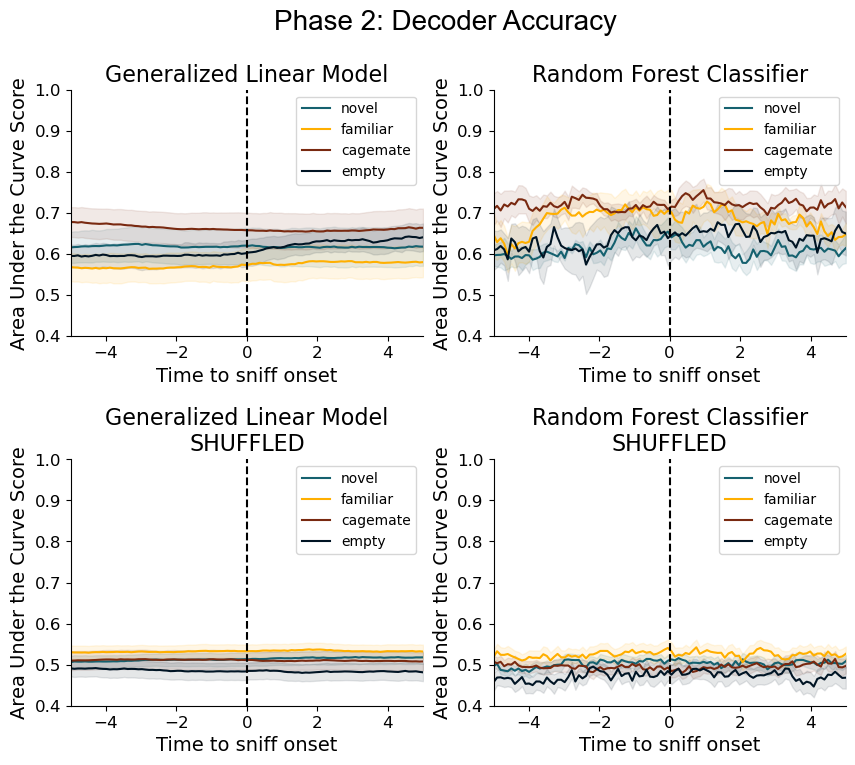

In [21]:
import math
import matplotlib.pyplot as plt
from scipy.stats import sem

glm = {}
glm_shuffle = {}
rf = {}
rf_shuffle = {}
for key in auc.keys():
    glm[key] = auc[key]['glm']
    rf[key] = auc[key]['rf']
    glm_shuffle_temp = []
    rf_shuffle_temp = []
    for i in range(5):
        glm_shuffle_temp.append(auc[key]['glm_shuffle'][i])
        rf_shuffle_temp.append(auc[key]['rf_shuffle'][i])
    glm_shuffle[key] = np.array(glm_shuffle_temp).reshape(25,100)
    rf_shuffle[key] = np.array(rf_shuffle_temp).reshape(25,100)
model_dict = {'Generalized Linear Model':glm, 'Random Forest Classifier':rf,
              'Generalized Linear Model\nSHUFFLED':glm_shuffle, 
              'Random Forest Classifier\nSHUFFLED':rf_shuffle}
pre_window = 5
equalize = 5
avg_auc = {}
no_plots = len(model_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
alpha = 0.1
plt.figure(figsize=(10,4*height_fig))
for key in model_dict.keys():
    novel_avg = np.mean(model_dict[key]['novel'], axis = 0)
    novel_sem = sem(model_dict[key]['novel'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(novel_avg))
    cagemate_avg = np.mean(model_dict[key]['cagemate'], axis = 0)
    cagemate_sem = sem(model_dict[key]['cagemate'], axis = 0)
    familiar_avg = np.mean(model_dict[key]['familiar'], axis = 0)
    familiar_sem = sem(model_dict[key]['familiar'], axis = 0)
    empty_avg = np.mean(model_dict[key]['empty'], axis = 0)
    empty_sem = sem(model_dict[key]['empty'], axis = 0)
    plt.subplot(height_fig,2,i)
    plt.plot(x, novel_avg, label ='novel', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novel_avg-novel_sem, novel_avg+novel_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiar_avg, label = 'familiar', color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiar_avg-familiar_sem, familiar_avg+familiar_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemate_avg, label = 'cagemate', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemate_avg-cagemate_sem, cagemate_avg+cagemate_sem,color=hex_2_rgb('#792910'), alpha = alpha)
    plt.plot(x, empty_avg, label =  'empty',  color=hex_2_rgb('#001424'))
    plt.fill_between(x, empty_avg-empty_sem, empty_avg+empty_sem, color=hex_2_rgb('#001424'), alpha = alpha)
    plt.title(f'{key}', fontsize = 16)
    plt.ylim(.4, 1)
    plt.xlim(-5,5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Time to sniff onset', fontsize=14)
    plt.ylabel('Area Under the Curve Score', fontsize=14)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.legend(bbox_to_anchor=(1,1))
    i += 1
plt.suptitle('Phase 2: Decoder Accuracy', fontsize = 20, font = 'Arial')
plt.subplots_adjust(hspace=0.5)
plt.show()


#this one is run on a pca emnedding of acquisition, empty, cagemate, novel, familiar ONLY
refined_auc = phase3_analysis.trial_decoder(5,5,post_window = 0, num_fold=5, num_shuffle=5, no_PCs=8,
                                            events = ['novel', 'familiar', 'cagemate'])
identity_auc = phase3_analysis.trial_decoder(5,5,post_window = 0, num_fold=5, num_shuffle=5, no_PCs=8,
                                            events = ['novel', 'familiar', 'acquisition'])

with open('refined_auc_phase3.pkl', 'wb') as file:
    pickle.dump(refined_auc, file)
with open('identity_auc_phase3.pkl', 'wb') as file:
    pickle.dump(identity_auc, file)

In [22]:
with open('refined_auc_phase3.pkl', 'rb') as file:
    refined_auc = pickle.load(file)
with open('identity_auc_phase3.pkl', 'rb') as file:
    identity_auc = pickle.load(file)

<Figure size 1000x800 with 0 Axes>

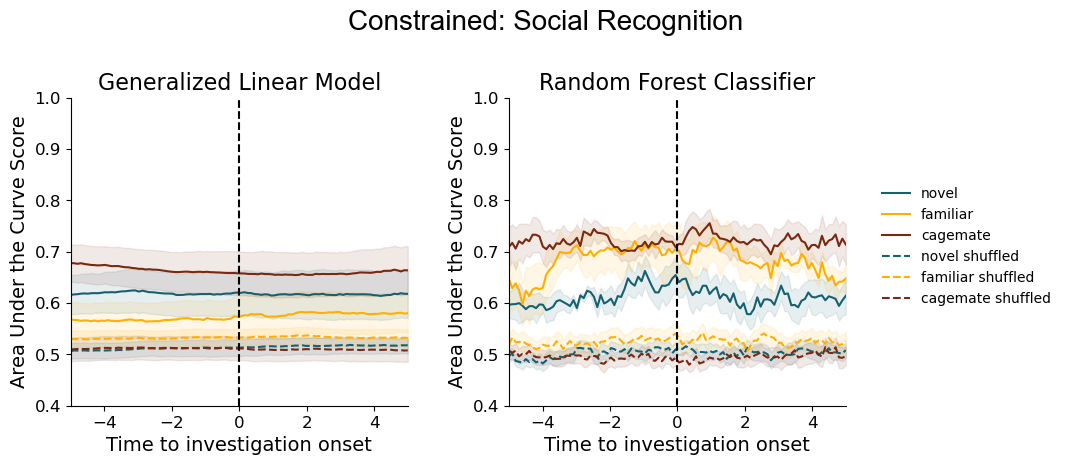

In [23]:
glm = {}
glm_shuffle = {}
rf = {}
rf_shuffle = {}
for key in refined_auc.keys():
    glm[key] = auc[key]['glm']
    rf[key] = auc[key]['rf']
    glm_shuffle_temp = []
    rf_shuffle_temp = []
    for i in range(5):
        glm_shuffle_temp.append(auc[key]['glm_shuffle'][i])
        rf_shuffle_temp.append(auc[key]['rf_shuffle'][i])
    glm_shuffle[key] = np.array(glm_shuffle_temp).reshape(25,100)
    rf_shuffle[key] = np.array(rf_shuffle_temp).reshape(25,100)
model_dict = {'Generalized Linear Model':glm, 'Random Forest Classifier':rf,
              'Generalized Linear Model\nSHUFFLED':glm_shuffle, 
              'Random Forest Classifier\nSHUFFLED':rf_shuffle}
pre_window = 5
equalize = 5
avg_auc = {}
no_plots = len(model_dict.keys())
height_fig = math.ceil(no_plots/2)
i = 1
alpha = 0.1
plt.figure(figsize=(10,4*height_fig))
plt.figure(figsize=(10,4))
for key in ['Generalized Linear Model', 'Random Forest Classifier']:
    novel_avg = np.mean(model_dict[key]['novel'], axis = 0)
    novel_sem = sem(model_dict[key]['novel'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(novel_avg))
    cagemate_avg = np.mean(model_dict[key]['cagemate'], axis = 0)
    cagemate_sem = sem(model_dict[key]['cagemate'], axis = 0)
    familiar_avg = np.mean(model_dict[key]['familiar'], axis = 0)
    familiar_sem = sem(model_dict[key]['familiar'], axis = 0)
    if key == 'Generalized Linear Model':
        shuffle_key = 'Generalized Linear Model\nSHUFFLED'
    else:
        shuffle_key = 'Random Forest Classifier\nSHUFFLED'
    novelshuf_avg = np.mean(model_dict[shuffle_key]['novel'], axis = 0)
    novelshuf_sem = sem(model_dict[shuffle_key]['novel'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(novelshuf_avg))
    cagemateshuf_avg = np.mean(model_dict[shuffle_key]['cagemate'], axis = 0)
    cagemateshuf_sem = sem(model_dict[shuffle_key]['cagemate'], axis = 0)
    familiarshuf_avg = np.mean(model_dict[shuffle_key]['familiar'], axis = 0)
    familiarshuf_sem = sem(model_dict[shuffle_key]['familiar'], axis = 0)
    plt.subplot(1,2,i)
    plt.plot(x, novel_avg, label ='novel', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novel_avg-novel_sem, novel_avg+novel_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiar_avg, label = 'familiar', color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiar_avg-familiar_sem, familiar_avg+familiar_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemate_avg, label = 'cagemate', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemate_avg-cagemate_sem, cagemate_avg+cagemate_sem,color=hex_2_rgb('#792910'), alpha = alpha)
    plt.plot(x, novelshuf_avg, label ='novel shuffled',  linestyle='--', color=hex_2_rgb('#15616F'))
    plt.fill_between(x, novelshuf_avg-novelshuf_sem, novelshuf_avg+novelshuf_sem,color=hex_2_rgb('#15616F'), alpha= alpha)
    plt.plot(x, familiarshuf_avg, label = 'familiar shuffled', linestyle='--',  color = (1.0, 0.6862745098039216, 0.0))
    plt.fill_between(x, familiarshuf_avg-familiarshuf_sem, familiarshuf_avg+familiarshuf_sem, color = (1.0, 0.6862745098039216, 0.0), alpha = alpha)
    plt.plot(x, cagemateshuf_avg, label = 'cagemate shuffled',  linestyle='--', color=hex_2_rgb('#792910'))
    plt.fill_between(x, cagemateshuf_avg-cagemateshuf_sem, cagemateshuf_avg+cagemateshuf_sem, color=hex_2_rgb('#792910'), alpha = alpha)
    plt.title(f'{key}', fontsize = 16)
    plt.ylim(.4, 1)
    plt.xlim(-5,5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Time to investigation onset', fontsize=14)
    plt.ylabel('Area Under the Curve Score', fontsize=14)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if i ==2:
        plt.legend(bbox_to_anchor = (1.07,.75), frameon=False)
    i += 1
plt.suptitle('Constrained: Social Recognition', fontsize = 20, font = 'Arial', x = .6, y = 1.1)
plt.subplots_adjust(wspace=0.3)
plt.show()


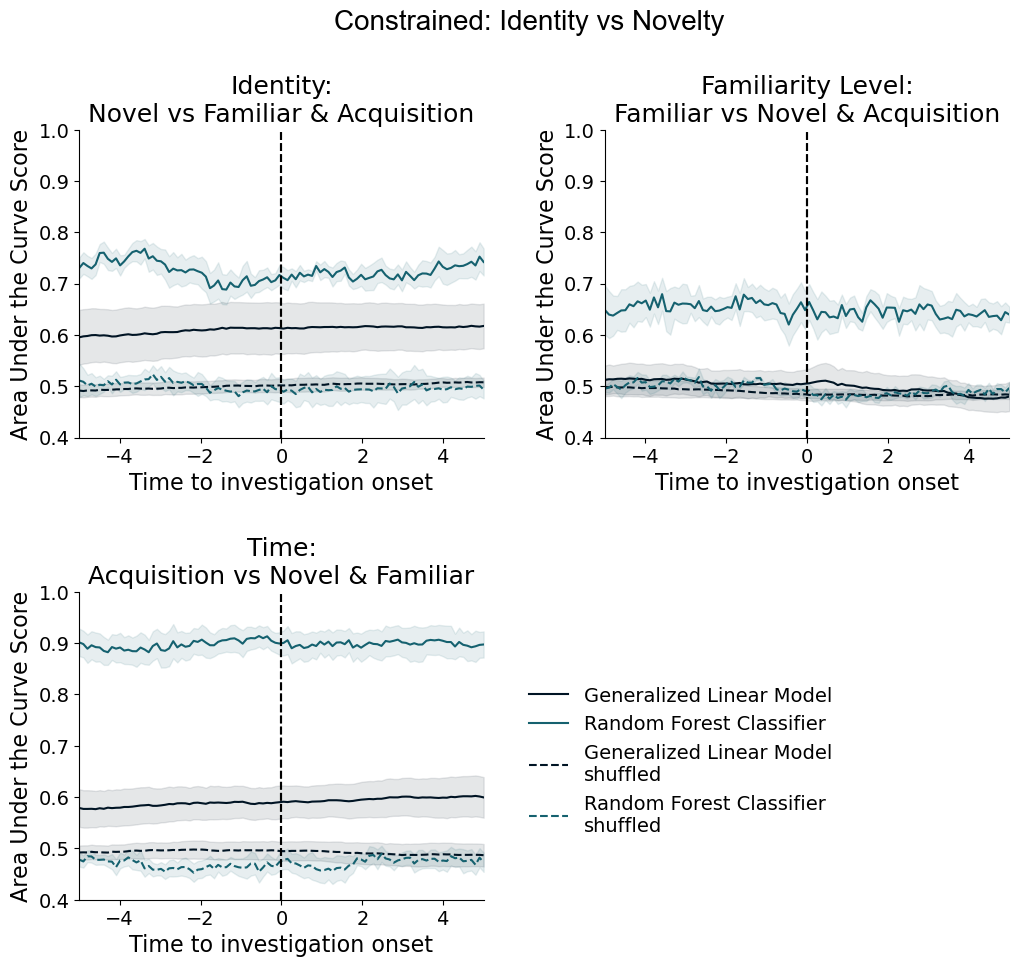

In [24]:
avg_auc = {}
no_plots = len(identity_auc.keys())
height_fig = math.ceil(no_plots/2)
i = 1
plt.figure(figsize=(12,10))
for key in identity_auc.keys():
    glm_avg = np.mean(identity_auc[key]['glm'], axis = 0)
    glm_sem = sem(identity_auc[key]['glm'], axis = 0)
    x =np.linspace(-pre_window, equalize, len(glm_avg))
    rf_avg = np.mean(identity_auc[key]['rf'], axis = 0)
    rf_sem = sem(identity_auc[key]['rf'], axis = 0)
    glm_shuffle_avg = np.mean(np.mean(identity_auc[key]['glm_shuffle'], axis = 1), axis = 0)
    glm_shuffle_sem = sem(np.mean(identity_auc[key]['glm_shuffle'], axis = 1), axis = 0)
    rf_shuffle_avg = np.mean(np.mean(identity_auc[key]['rf_shuffle'], axis = 1), axis = 0)
    rf_shuffle_sem = sem(np.mean(identity_auc[key]['rf_shuffle'], axis = 1), axis = 0)
    avg_auc[key] = [glm_avg, rf_avg, glm_shuffle_avg, rf_shuffle_avg]
    plt.subplot(2,2,i)
    plt.plot(x, glm_avg, label ='Generalized Linear Model', color = hex_2_rgb('#001424'))
    plt.fill_between(x, glm_avg-glm_sem, glm_avg+glm_sem, color = hex_2_rgb('#001424'), alpha = 0.1)
    plt.plot(x, rf_avg, label =  'Random Forest Classifier', color = hex_2_rgb('#15616F'))
    plt.fill_between(x, rf_avg-rf_sem, rf_avg+rf_sem, alpha = 0.1, color = hex_2_rgb('#15616F'))
    plt.plot(x, glm_shuffle_avg, linestyle='--', color = hex_2_rgb('#001424'), label = 'Generalized Linear Model\nshuffled')
    plt.fill_between(x, glm_shuffle_avg-glm_shuffle_sem, glm_shuffle_avg+glm_shuffle_sem, color = hex_2_rgb('#001424'), alpha = 0.1)
    plt.plot(x, rf_shuffle_avg, linestyle='--', label = 'Random Forest Classifier\nshuffled', color = hex_2_rgb('#15616F'))
    plt.fill_between(x, rf_shuffle_avg-rf_shuffle_sem, rf_shuffle_avg+rf_shuffle_sem, alpha = 0.1, color = hex_2_rgb('#15616F'))
    if key == 'familiar':
        plt.title('Familiarity Level:\nFamiliar vs Novel & Acquisition', fontsize = 18)
    if key == 'novel':
        plt.title('Identity:\nNovel vs Familiar & Acquisition', fontsize = 18)
    if key == 'acquisition':
        plt.title('Time:\nAcquisition vs Novel & Familiar', fontsize = 18)
    plt.ylim(.4, 1)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.xlim(-5,5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time to investigation onset', fontsize=16)
    plt.ylabel('Area Under the Curve Score', fontsize=16)
    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if i ==3:
        plt.legend(bbox_to_anchor = (1.07,.75), frameon=False, fontsize = 14)
    i += 1
plt.suptitle('Constrained: Identity vs Novelty', fontsize = 20, font = 'Arial', y = 1)
plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()

All set to analyze


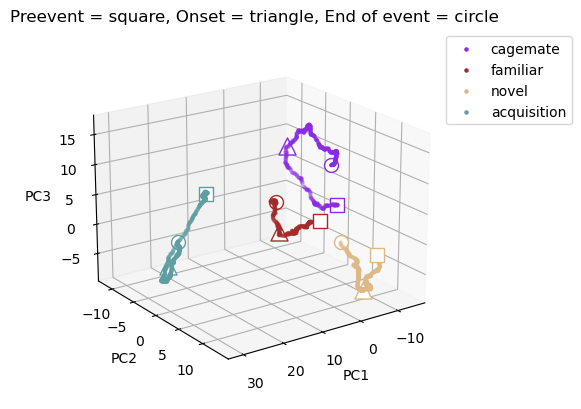

In [25]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, 100,50,0.5)
pca_df, coeff = pca_analysis.PCA_trajectories(5,5, events = ['cagemate', 'familiar', 'novel', 'acquisition'], d = 3, azim= 55, elev = 20)
geo_dis = pca_analysis.LOO_PCA(5,5,0.9, events = ['acquisition', 'familiar', 'novel', 'cagemate'])

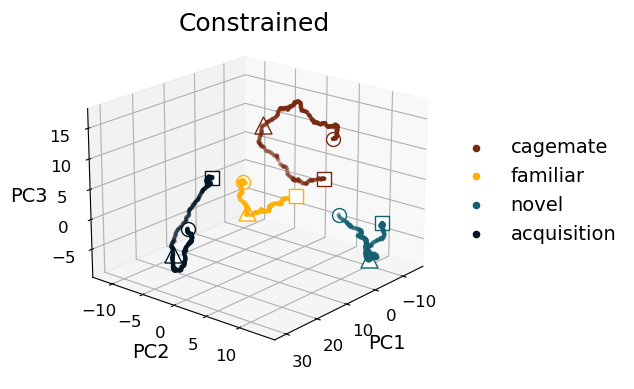

In [26]:

PCA_matrix = pca_df
PCA_key = ['cagemate', 'familiar', 'novel', 'acquisition']
equalize = 5
pre_window =5
post_window = 0
azim=45
elev=20
timebin = 50


event_lengths = int(
            (equalize + pre_window + post_window) * 1000 / timebin
        )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#792910'),  (1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F'), hex_2_rgb('#001424')]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
counter = 0 
for i in range(0, len(PCA_key)*event_lengths, event_lengths):
    event_label = PCA_key[counter]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        PCA_matrix[i : i + event_lengths, 2],
        label=event_label,
        s=5,
        color=colors[counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        PCA_matrix[i, 2],
        marker="s",
        s=100,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        PCA_matrix[onset, 2],
        marker="^",
        s=150,
        color="w",
        edgecolors=colors[counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        PCA_matrix[end, 2],
        marker="o",
        s=100,
        color="w",
        edgecolors=colors[counter],
    )
    counter += 1
ax.legend(loc="upper left", bbox_to_anchor=(1, .70), frameon = False, fontsize = 14, markerscale = 2)
ax.set_xlabel("PC1", fontsize = 14)
ax.set_ylabel("PC2", fontsize = 14)
ax.set_zlabel("PC3", fontsize = 14)
ax.tick_params(labelsize = 12)
ax.view_init(azim = 40, elev = 20
    )
plt.title('Constrained', fontsize = 18, y = 1, x = .5)
plt.show()



In [27]:
geo_dis_df = pd.DataFrame.from_dict(geo_dis)
geo_dis_df.to_excel('geo_dis_phase3.xlsx')
geo_dis_df

acquisition                              cagemate                familiar
      cagemate     familiar        novel    familiar       novel       novel
0  1082.752507   967.689350  1487.872741  553.750010  601.489182  729.220841
1  1273.091224  1101.664677  1384.781448  808.088033  792.790921  864.865301
2  1522.183834  1103.988693  1669.423489  636.449111  821.377024  956.528614
3  1538.098511  1163.195622  1711.343725  766.947179  867.436972  955.016081
4  1311.841125   927.289608  1404.457530  712.788157  833.163102  893.847291
5  1545.942754  1150.867957  1665.819440  733.589830  848.916369  939.798530
6  1693.293200  1289.421564  1672.263115  756.611083  687.596099  839.924598
7  1195.808301   882.960731  1025.548816  746.232639  805.747166  764.814526

In [32]:
average_values = geo_dis_df.mean()
import seaborn as sns
average_values

acquisition  cagemate    1361.759167
             familiar    1089.723845
             novel       1085.599347
cagemate     familiar     555.825318
             novel        467.743734
familiar     novel        577.338778
dtype: float64

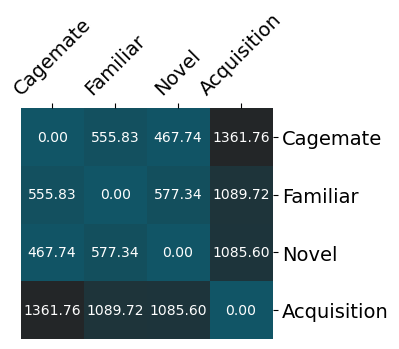

In [93]:
data = [
    [0,  555.825318, 467.743734,  1361.759167],
    [ 555.825318, 0,  577.338778,  1089.723845],
    [467.743734, 577.338778, 0, 1085.599347],
    [1361.759167,  1089.723845, 1085.599347, 0]
]


plt.figure(figsize=(3.25,3))
col_pal = sns.dark_palette("#156", reverse=True, as_cmap=True)
heatmap = sns.heatmap(data, cmap=col_pal, annot=True, fmt = '.2f', vmin= 450, cbar = False)  # 'd' for integer format
heatmap.set_xticklabels(['Cagemate', 'Familiar', 'Novel', 'Acquisition'], fontsize = 14, rotation = 45)
heatmap.set_yticklabels(['Cagemate', 'Familiar', 'Novel', 'Acquisition'], fontsize = 14, rotation = 0)
heatmap.xaxis.set_ticks_position('top')
heatmap.yaxis.set_ticks_position('right')

plt.show()

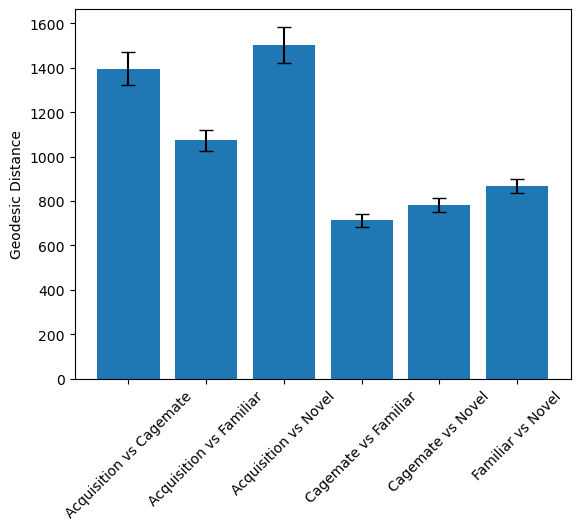

In [28]:

sems = geo_dis_df.sem()
plt.bar(['Acquisition vs Cagemate', 
         'Acquisition vs Familiar','Acquisition vs Novel',
           'Cagemate vs Familiar', 'Cagemate vs Novel',
          'Familiar vs Novel'], average_values, yerr=sems, capsize=5)

# Label the x-axis and y-axis
plt.ylabel('Geodesic Distance')
plt.xticks(rotation = 45)
# Show the plot
plt.show()

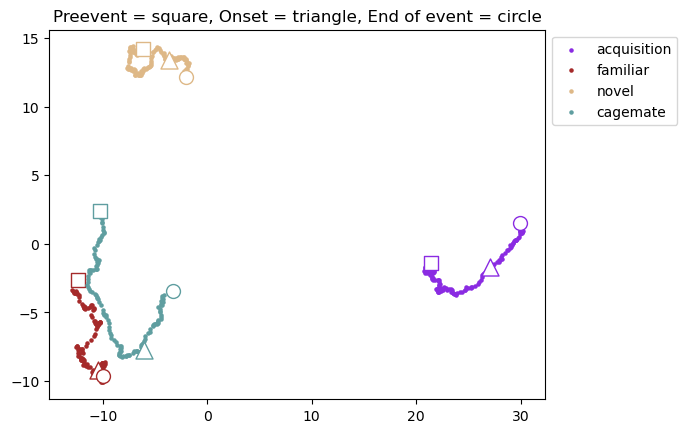

acquisition                              cagemate                familiar
      cagemate     familiar        novel    familiar       novel       novel
0  1498.282254  1202.156419  1196.305334  575.645562  470.672864  576.164397
1  1462.947165  1193.405445  1177.866493  561.310988  502.543663  640.906018
2  1460.627086  1108.582063  1142.612888  555.780740  535.258977  543.129513
3  1469.568410  1184.052722  1166.325113  638.235300  508.945696  696.897322
4  1532.400233  1117.715396  1266.592414  592.753219  465.747924  549.410527
5  1215.336666   853.934307   944.471176  646.390153  475.427316  618.368815
6  1471.106425  1205.643390  1248.080085  518.441090  399.326855  504.769617
7   783.805099   852.301015   542.541275  358.045494  384.026580  489.064015

In [29]:

pca_df = pca_analysis.PCA_trajectories(2,5, events = ['acquisition', 'familiar', 'novel', 'cagemate'])
geo_dis = pca_analysis.LOO_PCA(2,5,0.9, events = ['acquisition', 'familiar', 'novel', 'cagemate'])
geo_dis_df = pd.DataFrame.from_dict(geo_dis)
#geo_dis_df.to_excel('geo_dis_phase2.xlsx')
geo_dis_df

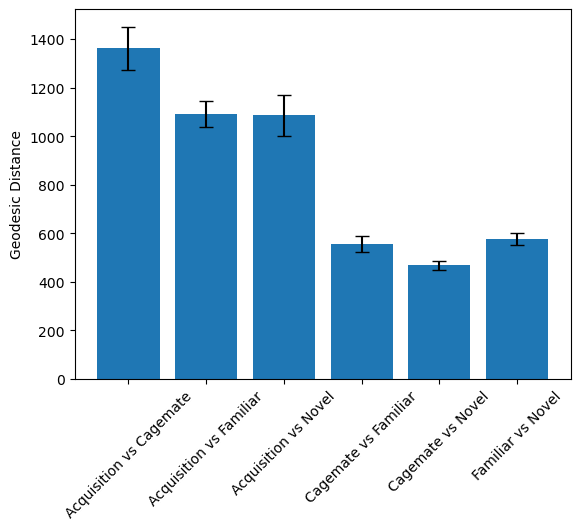

In [30]:
average_values = geo_dis_df.mean()
sems = geo_dis_df.sem()
plt.bar(['Acquisition vs Cagemate', 
         'Acquisition vs Familiar','Acquisition vs Novel',
           'Cagemate vs Familiar', 'Cagemate vs Novel',
          'Familiar vs Novel'], average_values, yerr=sems, capsize=5)

# Label the x-axis and y-axis
plt.ylabel('Geodesic Distance')
plt.xticks(rotation = 45)
# Show the plot
plt.show()

In [31]:

0,6, -1 = 75

2, 4, 1 = 69
2, 5, -2 = 64
1, 5, -1 = 64
3, 5, -1 = 63
3, 5, 0 = 62
1 , 5, -2 = 61
2, 4, 0 = 59
3, 4, 0 = 59
2, 4, -1 = 56
3, 5, -2 = 56




SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3840005537.py, line 1)

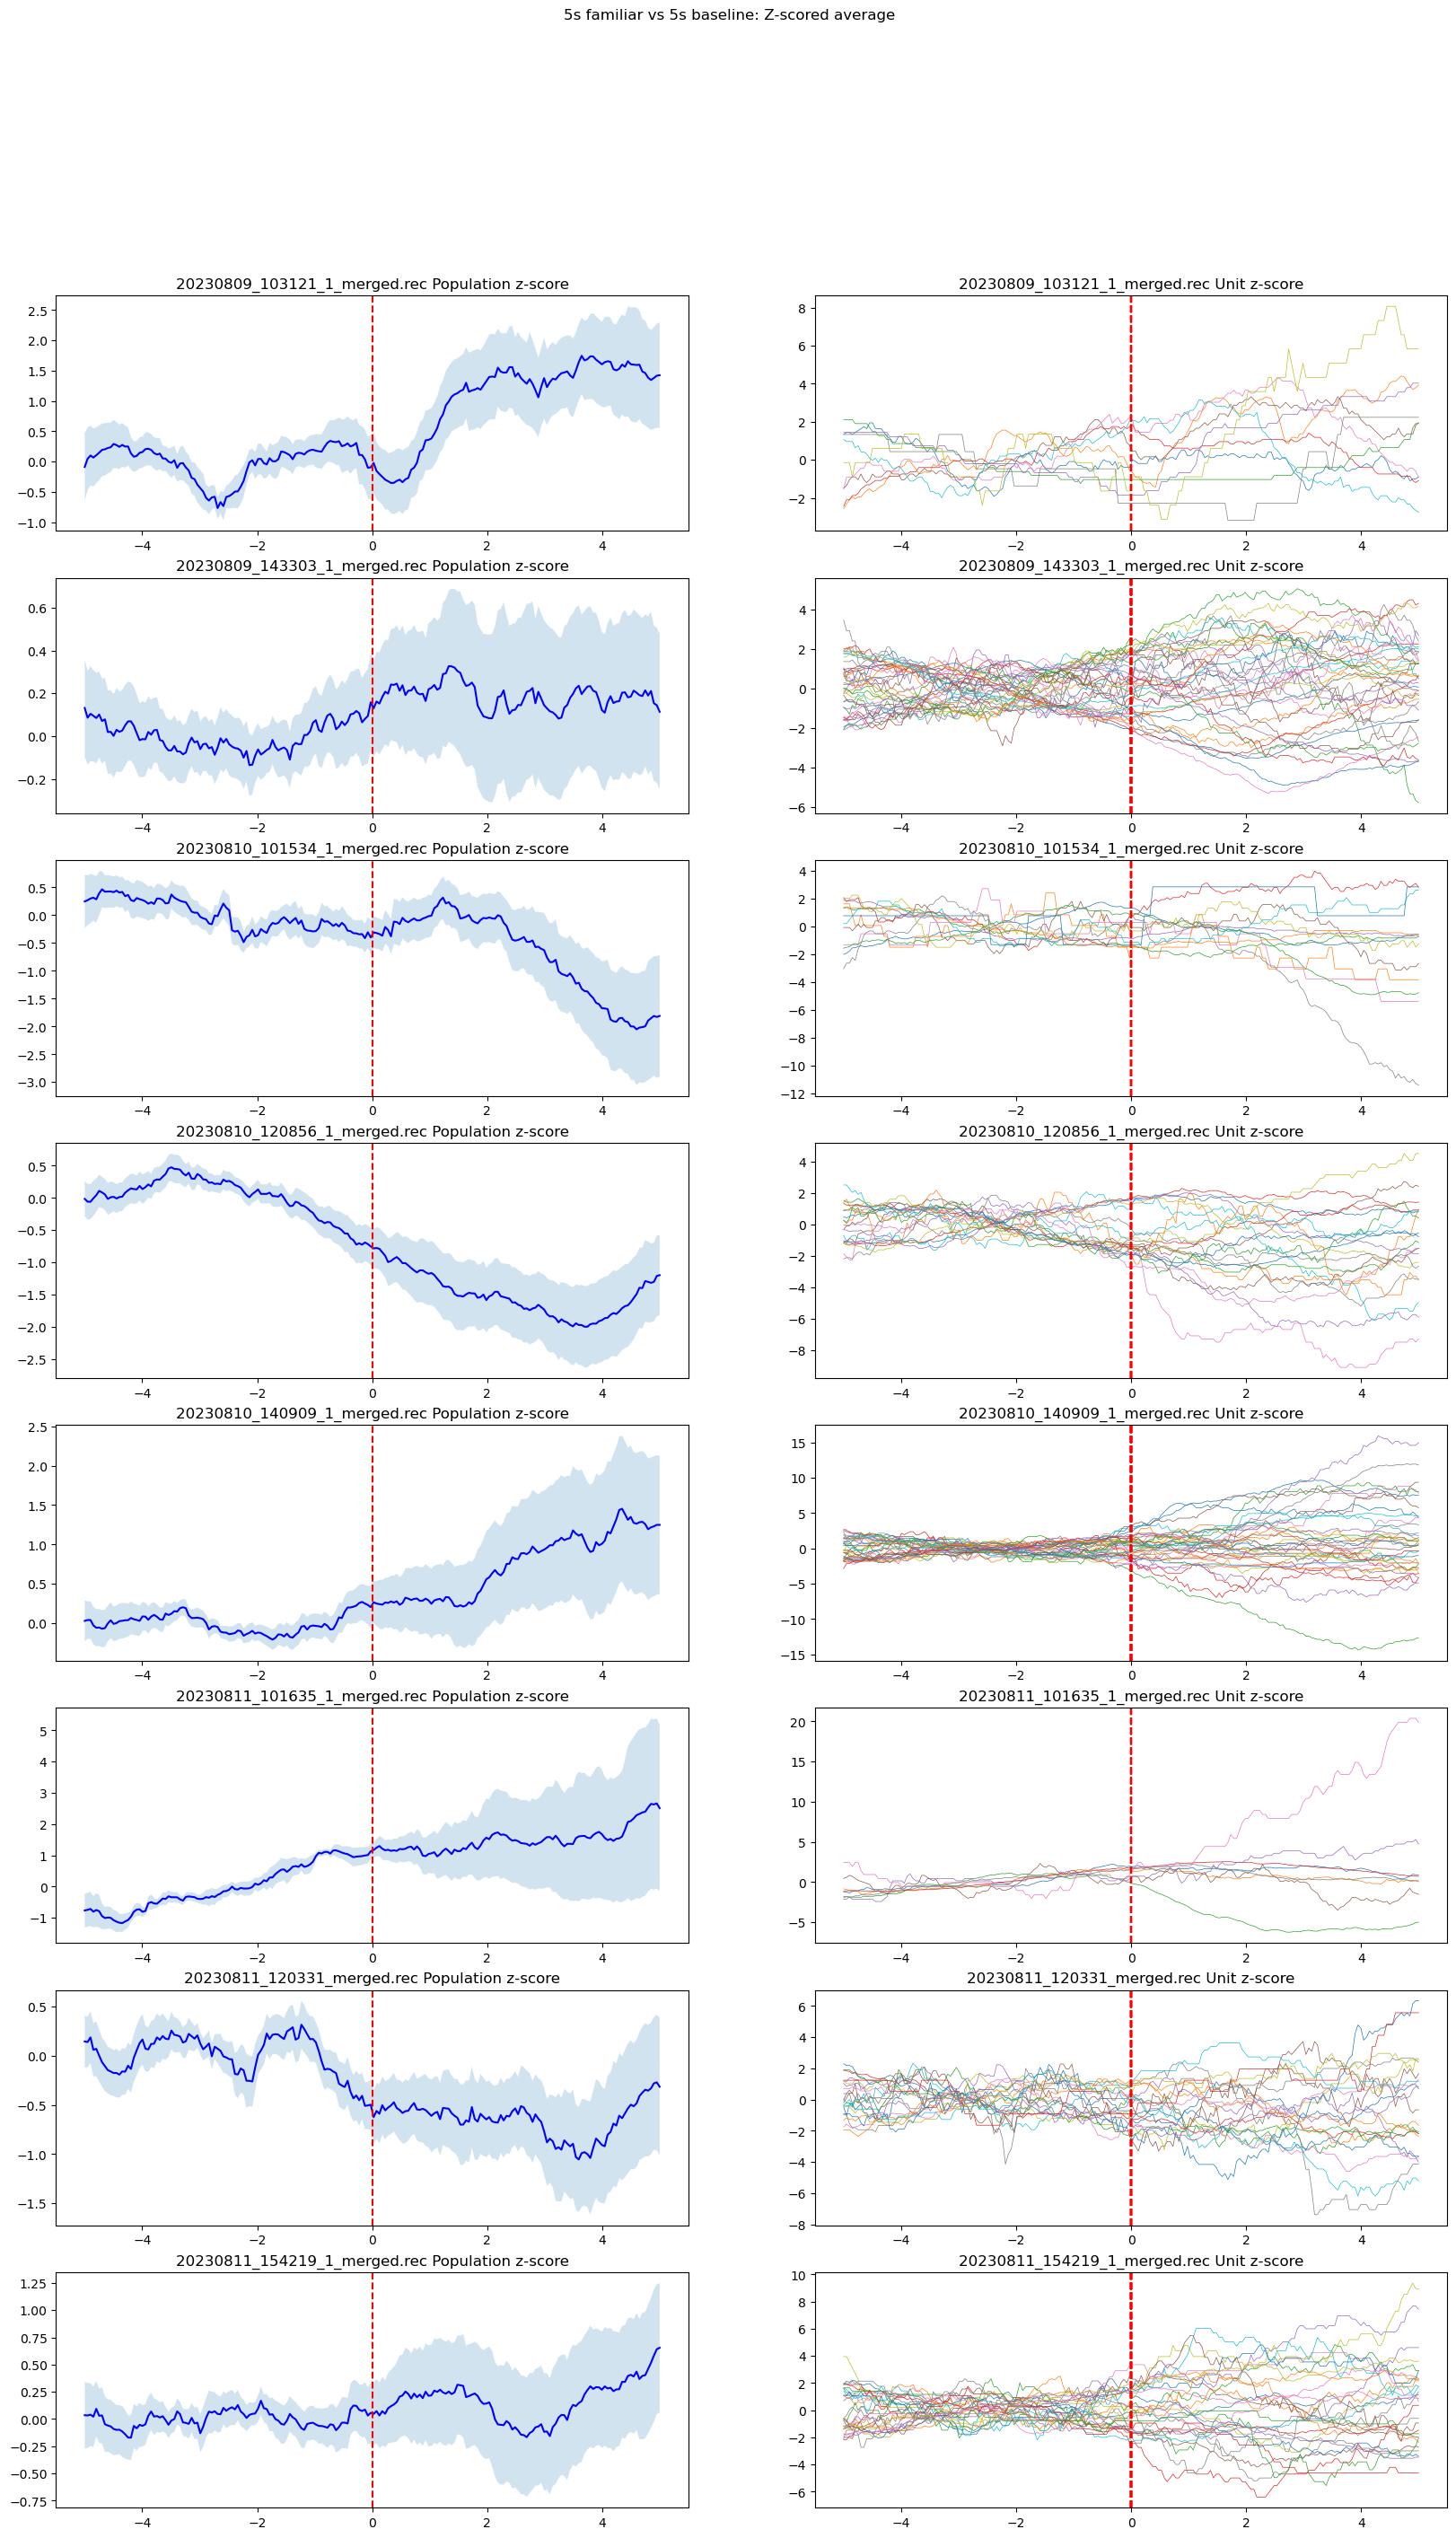

In [ ]:
pca_analysis.zscore_pre_event('familiar', 5, 5, 0)

In [ ]:
equalize = 0
baseline_window = 6
offset = -2
print(pca_analysis.fishers_exact_wilcox('novel', 'cagemate', equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None))
pca_analysis.fishers_exact_wilcox('familiar', 'acquisition',equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None)

(1.7748427672955975, 0.2289902875793868, [[17, 159], [10, 166]])


(1.0, 1.0, [[24, 152], [24, 152]])

In [ ]:
equalize = 1
baseline_window = 5
offset = -1
print(pca_analysis.fishers_exact_wilcox('novel', 'cagemate', equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None))
pca_analysis.fishers_exact_wilcox('familiar', 'acquisition',equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None)

(0.9174484052532833, 1.0, [[12, 164], [13, 163]])


(0.840867992766727, 0.7345423879716292, [[18, 158], [21, 155]])

In [ ]:
event_info = {}
i = 0
for behavior_dict in behavior_dicts:
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for sniff in events:
            sniff_length_temp = sniff[1] - sniff[0]
            sniff_length = sniff_length +sniff_length_temp
        total_sniff_time = sniff_length/1000
        avg_event = sniff_length/no_events/1000
        if i in event_info.keys():
            dict_event = event_info[i]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[i] =  dict_event
        else:
            event_info[i] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    i += 1

In [ ]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview.to_excel('phase3_behaviordata.xlsx')

In [ ]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_total_time_averages = {}
for event in event_dict_keys:
    avg_event = event_total_time[event].mean()
    if (event == 'baseline empty cup') | (event == 'empty ITI cup') | (event == 'empty cup'):    
        event_total_time_averages[event] = avg_event/3
    else:
        event_total_time_averages[event] = avg_event
event_total_time_averages

{'acquisition': 109.6748888888889,
 'cagemate': 104.83833333333354,
 'empty': 18.26011111111119,
 'novel': 55.682111111111084,
 'familiar': 46.76199999999992}

In [ ]:
event_numbers = event_overview[event_overview['level_1'] == 'no_events']
event_numbers_averages = {}
for event in event_dict_keys:
    avg_event = event_numbers[event].mean()
    if (event == 'baseline empty cup') | (event == 'empty ITI cup')| (event == 'empty cup'):    
        event_numbers_averages[event] = avg_event/3
    else:
        event_numbers_averages[event] = avg_event
event_numbers_averages

{'acquisition': 15.333333333333334,
 'cagemate': 15.555555555555555,
 'empty': 5.888888888888889,
 'novel': 11.555555555555555,
 'familiar': 9.88888888888889}

In [ ]:
import matplotlib.pyplot as plt
colors = ['#9a9896', '#9a9896', '#Bb005d', '#9a9896', '#A8778f', '#6401e8','#9a9896',
'#01e852', '#Bb005d']

Text(0, 0.5, 'Total sniff (s)')

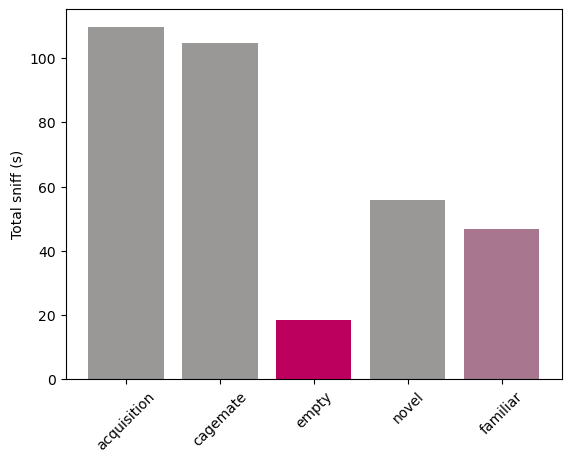

In [ ]:
plt.bar(event_total_time_averages.keys(), event_total_time_averages.values(), color = colors)
plt.xticks(rotation=45)
plt.ylabel('Total sniff (s)')

In [ ]:


def get_fam_score(acquisition_vs_novel, recall_vs_cagemate, recall_vs_novel, cagemate_vs_novel, acquisition_vs_recall, id_score):
    fam_score = 0
    if acquisition_vs_novel == 'not significant':
        if recall_vs_cagemate != 'not significant':
            fam_score +=1
        if recall_vs_novel != 'not significant':
            fam_score +=1
        if cagemate_vs_novel != 'not significant':
            fam_score +=2
        if (id_score != 0):
            if id_score == 'familiarity?':
                fam_score = fam_score
            else:
                fam_score += (-2)
        if acquisition_vs_recall != 'not significant':
            fam_score += 1
    return fam_score

def get_id_score(acquisition_vs_novel, recall_vs_cagemate, recall_vs_novel, cagemate_vs_novel, acquisition_vs_recall):
    id_score = 0
    if acquisition_vs_recall == 'not significant':
        if (recall_vs_cagemate != 'not significant') & (cagemate_vs_novel != 'not significant'):
                id_score = 'cagemate'
        if (recall_vs_novel != 'not significant') & (recall_vs_cagemate != 'not significant'):
                id_score = 'familiar'
        if (recall_vs_novel != 'not significant') & (cagemate_vs_novel != 'not significant'):
                id_score = 'novel'
        if (recall_vs_novel != 'not significant') & (cagemate_vs_novel != 'not significant') & (recall_vs_cagemate != 'not significant'):
             id_score = 'familiarity?'
    if acquisition_vs_recall != 'not significant':
         if (recall_vs_novel != 'not significant') & (recall_vs_cagemate != 'not significant'):
                id_score = 'recall'
    return id_score


In [ ]:
equalize = 2
baseline_window = 5
offset = -2
print(pca_analysis.fishers_exact_wilcox('novel', 'cagemate', equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None))
pca_analysis.fishers_exact_wilcox('familiar', 'acquisition',equalize = equalize, baseline_window=baseline_window,offset= offset, event3 = None)

(0.8466898954703833, 0.8389664235453562, [[12, 164], [14, 162]])


(0.8886075949367088, 0.8638678912675021, [[18, 158], [20, 156]])

In [ ]:
for event in ['novel', 'cagemate', 'familiar', 'acquisition']:
    pca_analysis.wilcox_baseline_v_event_collection(event=event, equalize =equalize, baseline_window=baseline_window, offset=offset, plot = False, save = True)

In [ ]:
phase3_collection.wilcox_dfs.keys()

dict_keys(['2s novel vs 4s baseline', '2s cagemate vs 4s baseline', '2s familiar vs 4s baseline', '2s acquisition vs 4s baseline', '2s novel vs 5s baseline', '2s cagemate vs 5s baseline', '2s familiar vs 5s baseline', '2s acquisition vs 5s baseline'])

In [ ]:
df_list = []
for comparison in ['2s novel vs 5s baseline', '2s cagemate vs 5s baseline', '2s familiar vs 5s baseline', '2s acquisition vs 5s baseline']:
    df = phase3_collection.wilcox_dfs[comparison]
    df_list.append(df)

is_first = True 
for df in df_list:
    if is_first:
        master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
    

master_df
#novel vs baseline

C:\Users\megha\AppData\Local\Temp\ipykernel_13460\3078230770.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'event1 vs event2_x', 'Event_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')


Subject                     Recording  original unit id  \
0       1.1  20230809_103121_1_merged.rec               293   
1       1.1  20230809_103121_1_merged.rec                80   
2       1.1  20230809_103121_1_merged.rec               252   
3       1.1  20230809_103121_1_merged.rec               211   
4       1.1  20230809_103121_1_merged.rec               276   
..      ...                           ...               ...   
171     1.4  20230811_154219_1_merged.rec                76   
172     1.4  20230811_154219_1_merged.rec               149   
173     1.4  20230811_154219_1_merged.rec               135   
174     1.4  20230811_154219_1_merged.rec                38   
175     1.4  20230811_154219_1_merged.rec               136   

                     Event_x event1 vs event2_x                     Event_y  \
0    2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
1    2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
2    2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
3    2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
4    2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
..                       ...                ...                         ...   
171  2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
172  2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
173  2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
174  2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   
175  2s novel vs 5s baseline    not significant  2s cagemate vs 5s baseline   

    event1 vs event2_y                     Event_x event1 vs event2_x  \
0      not significant  2s familiar vs 5s baseline    not significant   
1      not significant  2s familiar vs 5s baseline    not significant   
2      not significant  2s familiar vs 5s baseline    not significant   
3      not significant  2s familiar vs 5s baseline    not significant   
4            increases  2s familiar vs 5s baseline    not significant   
..                 ...                         ...                ...   
171    not significant  2s familiar vs 5s baseline    not significant   
172    not significant  2s familiar vs 5s baseline    not significant   
173    not significant  2s familiar vs 5s baseline    not significant   
174          increases  2s familiar vs 5s baseline    not significant   
175    not significant  2s familiar vs 5s baseline    not significant   

                           Event_y event1 vs event2_y  
0    2s acquisition vs 5s baseline    not significant  
1    2s acquisition vs 5s baseline    not significant  
2    2s acquisition vs 5s baseline    not significant  
3    2s acquisition vs 5s baseline          increases  
4    2s acquisition vs 5s baseline    not significant  
..                             ...                ...  
171  2s acquisition vs 5s baseline    not significant  
172  2s acquisition vs 5s baseline    not significant  
173  2s acquisition vs 5s baseline    not significant  
174  2s acquisition vs 5s baseline    not significant  
175  2s acquisition vs 5s baseline    not significant  

[176 rows x 11 columns]

In [ ]:
master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'novel vs baseline',
 'Event_y',
 'cagemate vs baseline',
 'Event_x',
 'familiar vs baseline',
 'Event_y',
 'acquisition vs baseline' ]
master_df = master_df[['original unit id',
 'novel vs baseline',
 'cagemate vs baseline',
 'familiar vs baseline',
 'acquisition vs baseline'
 ]]
master_df

original unit id novel vs baseline cagemate vs baseline  \
0                 293   not significant      not significant   
1                  80   not significant      not significant   
2                 252   not significant      not significant   
3                 211   not significant      not significant   
4                 276   not significant            increases   
..                ...               ...                  ...   
171                76   not significant      not significant   
172               149   not significant      not significant   
173               135   not significant      not significant   
174                38   not significant            increases   
175               136   not significant      not significant   

    familiar vs baseline acquisition vs baseline  
0        not significant         not significant  
1        not significant         not significant  
2        not significant         not significant  
3        not significant               increases  
4        not significant         not significant  
..                   ...                     ...  
171      not significant         not significant  
172      not significant         not significant  
173      not significant         not significant  
174      not significant         not significant  
175      not significant         not significant  

[176 rows x 5 columns]

In [ ]:
def group_cells(novel, cagemate, fam, acquisition):
    group = ''
    if novel != 'not significant':
        group = 'novel'
    if cagemate != 'not significant':
        group = group + 'cagemate' 
    if fam != 'not significant':
        group = group + 'fam'
    if acquisition != 'not significant':
        group = group + 'acquisition'
    return group

master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline'],
                                                                  row['cagemate vs baseline'],
                                                                  row['familiar vs baseline'],
                                                                  row['acquisition vs baseline']), axis = 1)
results = master_df.groupby('cell group').count()
results

C:\Users\megha\AppData\Local\Temp\ipykernel_13460\2510486990.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline'],


original unit id  novel vs baseline  \
cell group                                                 
                                  120                120   
acquisition                        17                 17   
cagemate                           13                 13   
fam                                13                 13   
famacquisition                      1                  1   
novel                               7                  7   
novelacquisition                    1                  1   
novelcagematefam                    1                  1   
novelfam                            2                  2   
novelfamacquisition                 1                  1   

                     cagemate vs baseline  familiar vs baseline  \
cell group                                                        
                                      120                   120   
acquisition                            17                    17   
cagemate                               13                    13   
fam                                    13                    13   
famacquisition                          1                     1   
novel                                   7                     7   
novelacquisition                        1                     1   
novelcagematefam                        1                     1   
novelfam                                2                     2   
novelfamacquisition                     1                     1   

                     acquisition vs baseline  
cell group                                    
                                         120  
acquisition                               17  
cagemate                                  13  
fam                                       13  
famacquisition                             1  
novel                                      7  
novelacquisition                           1  
novelcagematefam                           1  
novelfam                                   2  
novelfamacquisition                        1

NameError: name 'plt' is not defined

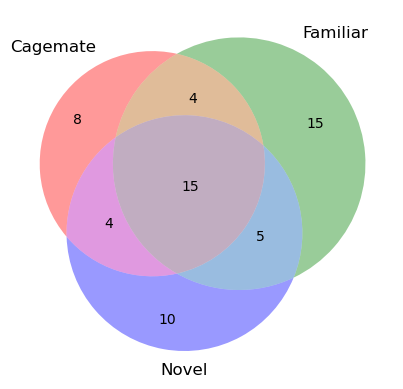

In [ ]:

from matplotlib_venn import venn3  # For a three-set Venn diagram

# Define the sets (you can replace these with your own data)
overlap_counts = (8, 15, 4, 10, 4, 5, 15)

# Create the Venn diagram
venn3(subsets=overlap_counts, set_labels=('Cagemate', 'Familiar', 'Novel'))

# Add labels
# plt.text(0.35, 0.7, 'A', fontsize=12, va='center')
# plt.text(0.7, 0.7, 'B', fontsize=12, va='center')
# plt.text(0.5, 0.3, 'C', fontsize=12, va='center')
# plt.text(0.85, 0.3, 'E', fontsize=12, va='center')
# plt.text(0.57, 0.45, 'D', fontsize=12, va='center')
# plt.text(0.65, 0.15, 'F', fontsize=12, va='center')
# plt.text(0.75, 0.6, 'G', fontsize=12, va='center')
# plt.text(0.45, 0.15, 'H', fontsize=12, va='center')

# Display the Venn diagram
plt.title('Social Recognition Phase')
plt.show()




In [ ]:
master_df = master_df[master_df['cell group'] != '']
master_df

NameError: name 'master_df' is not defined

In [ ]:
master_df[master_df['cell group'] == 'novelcagematefam']

NameError: name 'master_df' is not defined

In [ ]:
master_df[master_df['cell group'] == 'novelfam']

original unit id novel vs baseline empty cup (3s)  \
22                165                        increases   
111               453                        decreases   
147               195                        increases   
175                32                        decreases   
179               135                        increases   

    cagemate vs baseline empty cup (3s) familiar vs baseline empty cup (3s)  \
22                      not significant                           increases   
111                     not significant                           decreases   
147                     not significant                           increases   
175                     not significant                           decreases   
179                     not significant                           increases   

    acquisition vs baseline empty cup (3s) novel vs familiar (3s)  \
22                         not significant        not significant   
111                        not significant        not significant   
147                        not significant        not significant   
175                        not significant        not significant   
179                        not significant        not significant   

    novel vs cagemate (3s) cagemate vs familiar (3s) cell group  
22         not significant           not significant   novelfam  
111        not significant           not significant   novelfam  
147              increases                 decreases   novelfam  
175              decreases           not significant   novelfam  
179              increases                 decreases   novelfam

<Figure size 2000x0 with 0 Axes>

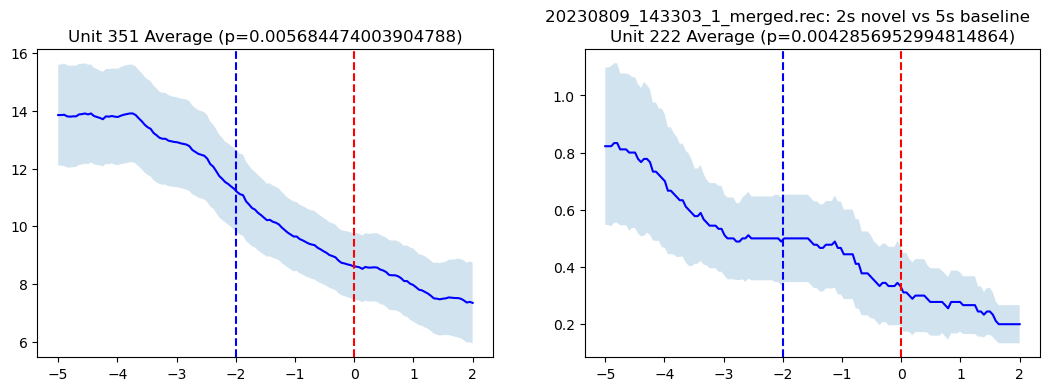

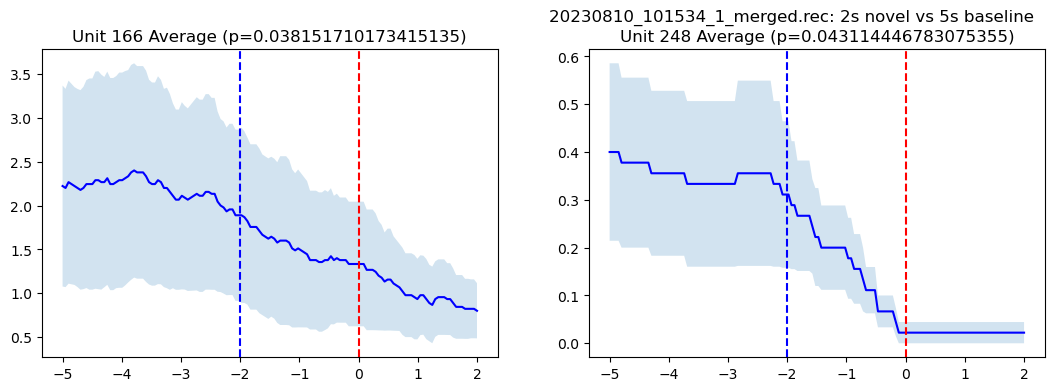

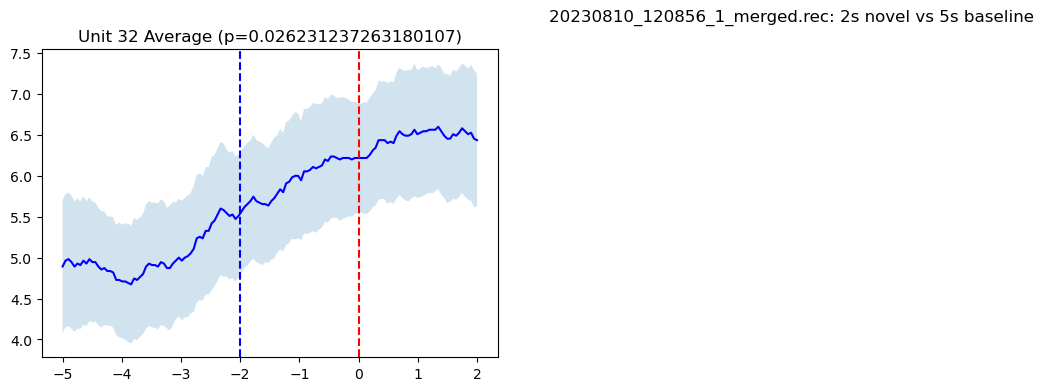

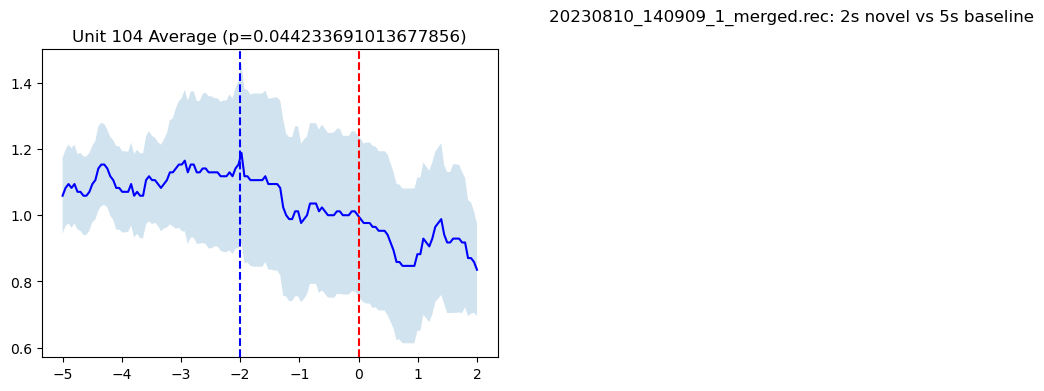

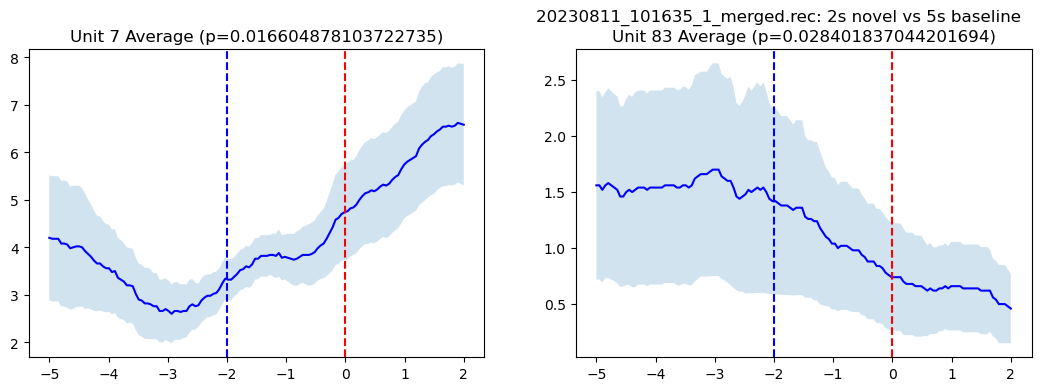

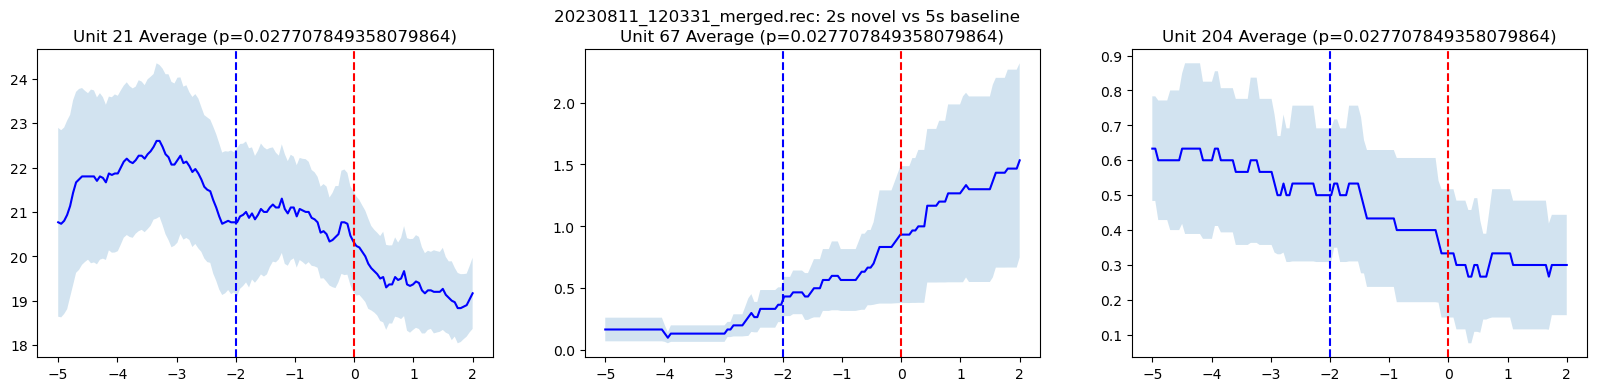

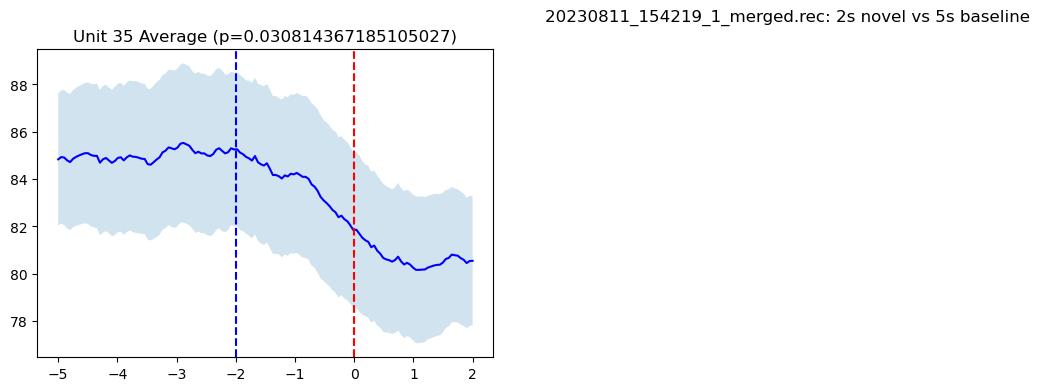

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 293            5.0  0.500184  not significant   
1                  80            7.0  0.892738  not significant   
2                 252            0.0  0.179712  not significant   
3                 211            1.0  0.079616  not significant   
4                 276            3.0  0.224916  not significant   
..                ...            ...       ...              ...   
171                76           76.0  0.059332  not significant   
172               149          108.0  0.361533  not significant   
173               135          122.0  0.626514  not significant   
174                38           81.0  0.139599  not significant   
175               136          106.0  0.330415  not significant   

                        Recording Subject                    Event  
0    20230809_103121_1_merged.rec     1.1  2s novel vs 5s baseline  
1    20230809_103121_1_merged.rec     1.1  2s novel vs 5s baseline  
2    20230809_103121_1_merged.rec     1.1  2s novel vs 5s baseline  
3    20230809_103121_1_merged.rec     1.1  2s novel vs 5s baseline  
4    20230809_103121_1_merged.rec     1.1  2s novel vs 5s baseline  
..                            ...     ...                      ...  
171  20230811_154219_1_merged.rec     1.4  2s novel vs 5s baseline  
172  20230811_154219_1_merged.rec     1.4  2s novel vs 5s baseline  
173  20230811_154219_1_merged.rec     1.4  2s novel vs 5s baseline  
174  20230811_154219_1_merged.rec     1.4  2s novel vs 5s baseline  
175  20230811_154219_1_merged.rec     1.4  2s novel vs 5s baseline  

[176 rows x 7 columns]

In [ ]:
pca_analysis.wilcox_baseline_v_event_collection('novel', 2, 5, -2)

<Figure size 2000x0 with 0 Axes>

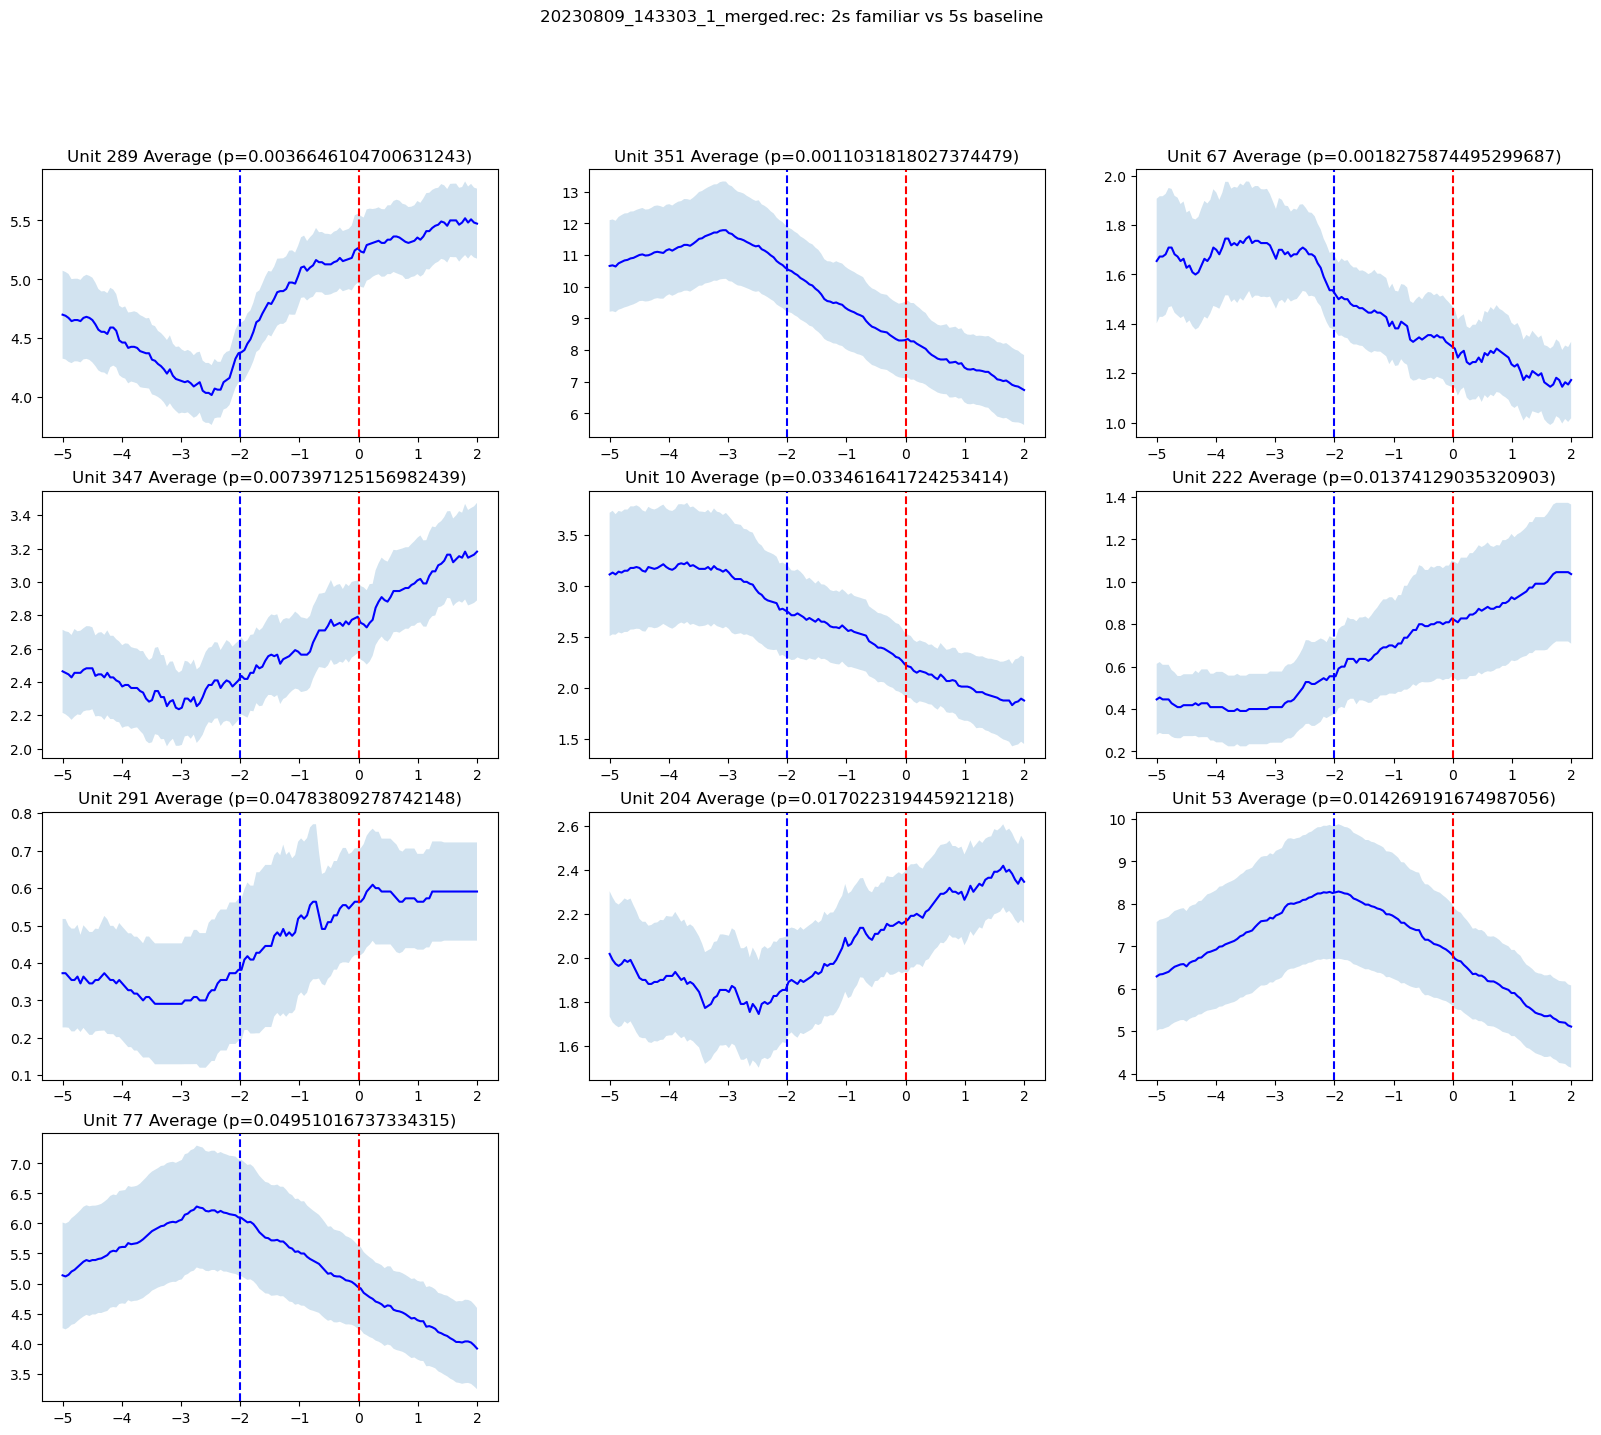

<Figure size 2000x0 with 0 Axes>

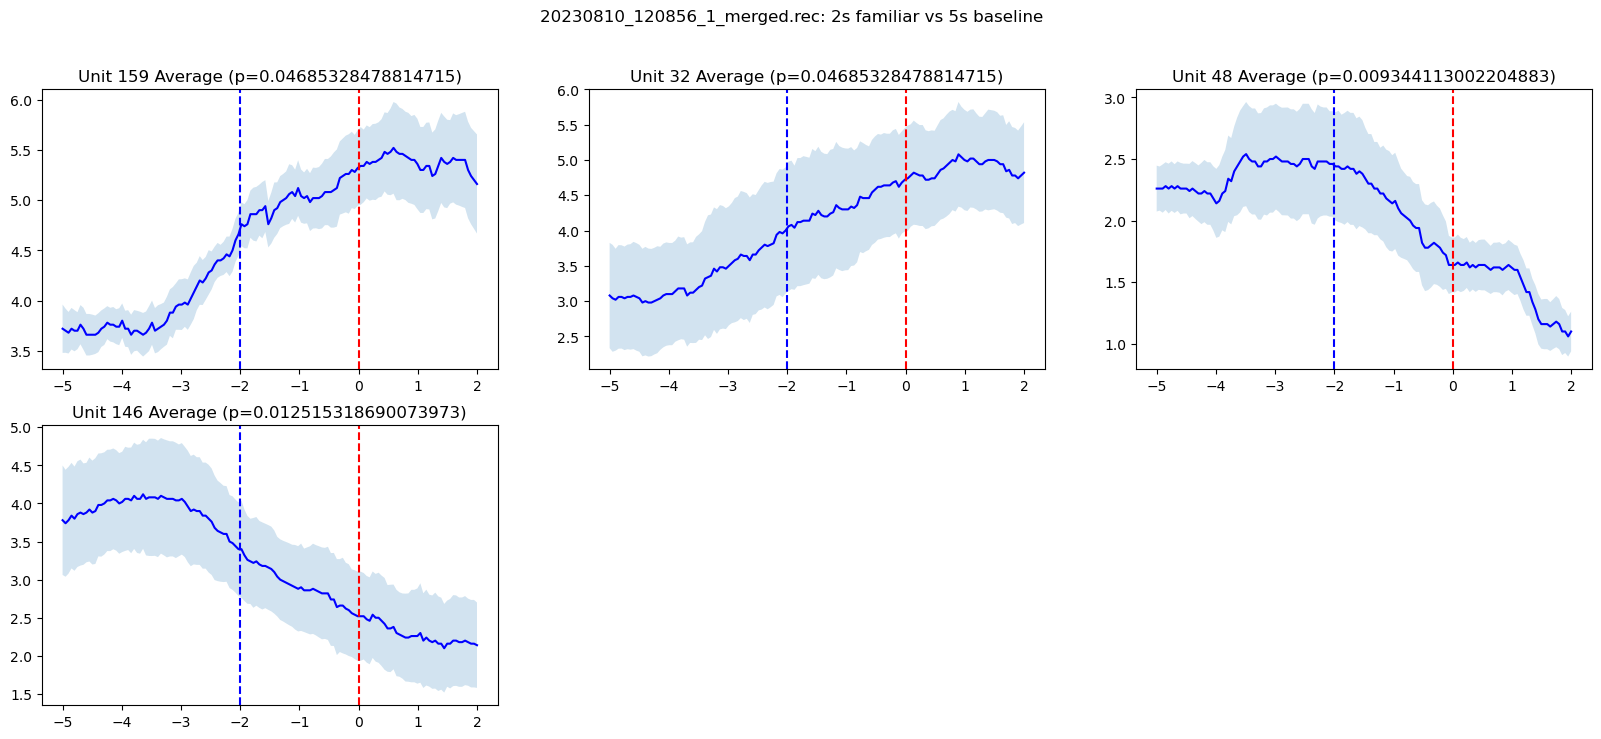

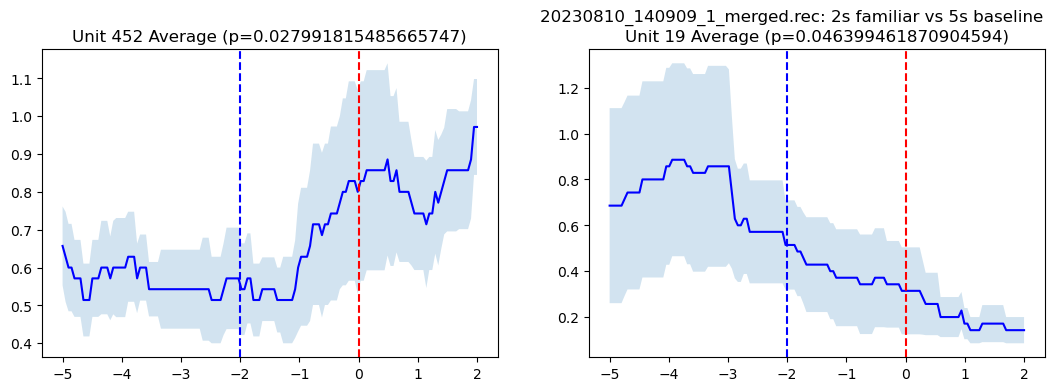

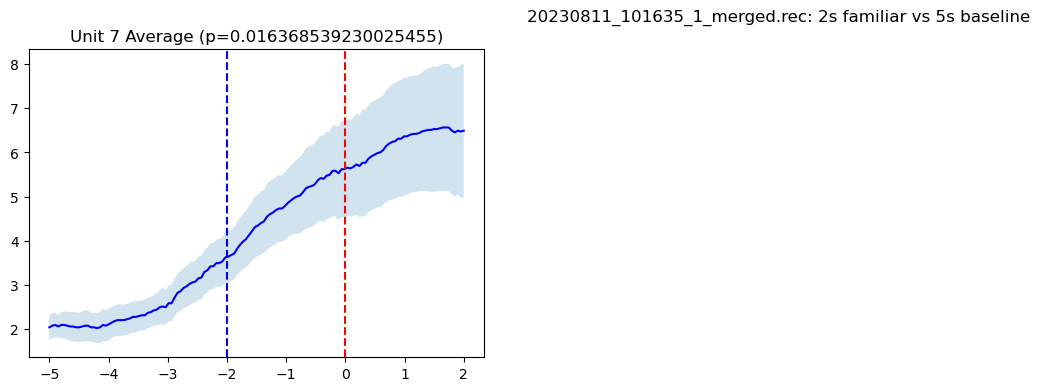

<Figure size 2000x0 with 0 Axes>

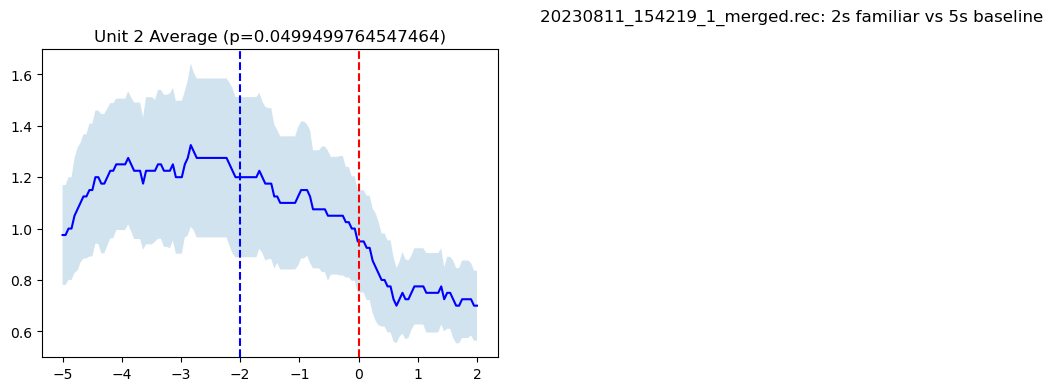

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 293            4.0  0.715001  not significant   
1                  80            4.0  0.715001  not significant   
2                 252            0.0  0.108809  not significant   
3                 211            4.0  0.715001  not significant   
4                 276            4.0  0.715001  not significant   
..                ...            ...       ...              ...   
171                76           18.0  1.000000  not significant   
172               149           15.0  0.674424  not significant   
173               135           17.0  0.888638  not significant   
174                38           13.0  0.865772  not significant   
175               136            7.0  0.123485  not significant   

                        Recording Subject                       Event  
0    20230809_103121_1_merged.rec     1.1  2s familiar vs 5s baseline  
1    20230809_103121_1_merged.rec     1.1  2s familiar vs 5s baseline  
2    20230809_103121_1_merged.rec     1.1  2s familiar vs 5s baseline  
3    20230809_103121_1_merged.rec     1.1  2s familiar vs 5s baseline  
4    20230809_103121_1_merged.rec     1.1  2s familiar vs 5s baseline  
..                            ...     ...                         ...  
171  20230811_154219_1_merged.rec     1.4  2s familiar vs 5s baseline  
172  20230811_154219_1_merged.rec     1.4  2s familiar vs 5s baseline  
173  20230811_154219_1_merged.rec     1.4  2s familiar vs 5s baseline  
174  20230811_154219_1_merged.rec     1.4  2s familiar vs 5s baseline  
175  20230811_154219_1_merged.rec     1.4  2s familiar vs 5s baseline  

[176 rows x 7 columns]

In [ ]:
pca_analysis.wilcox_baseline_v_event_collection('familiar', 2, 5, -2)

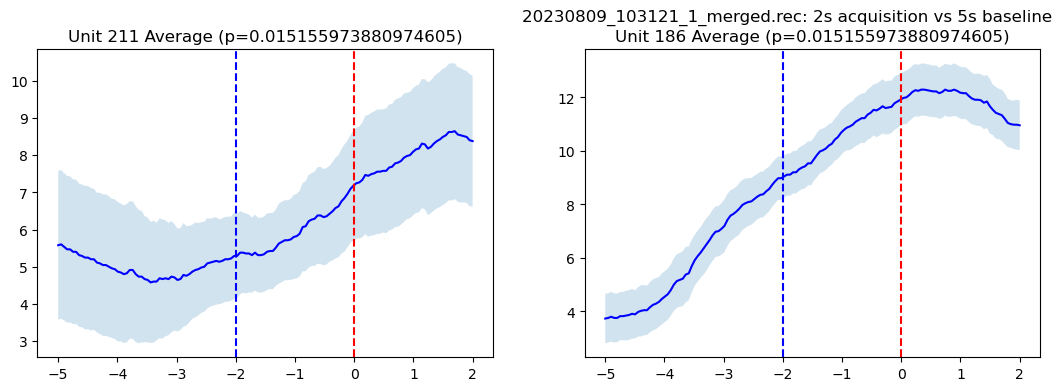

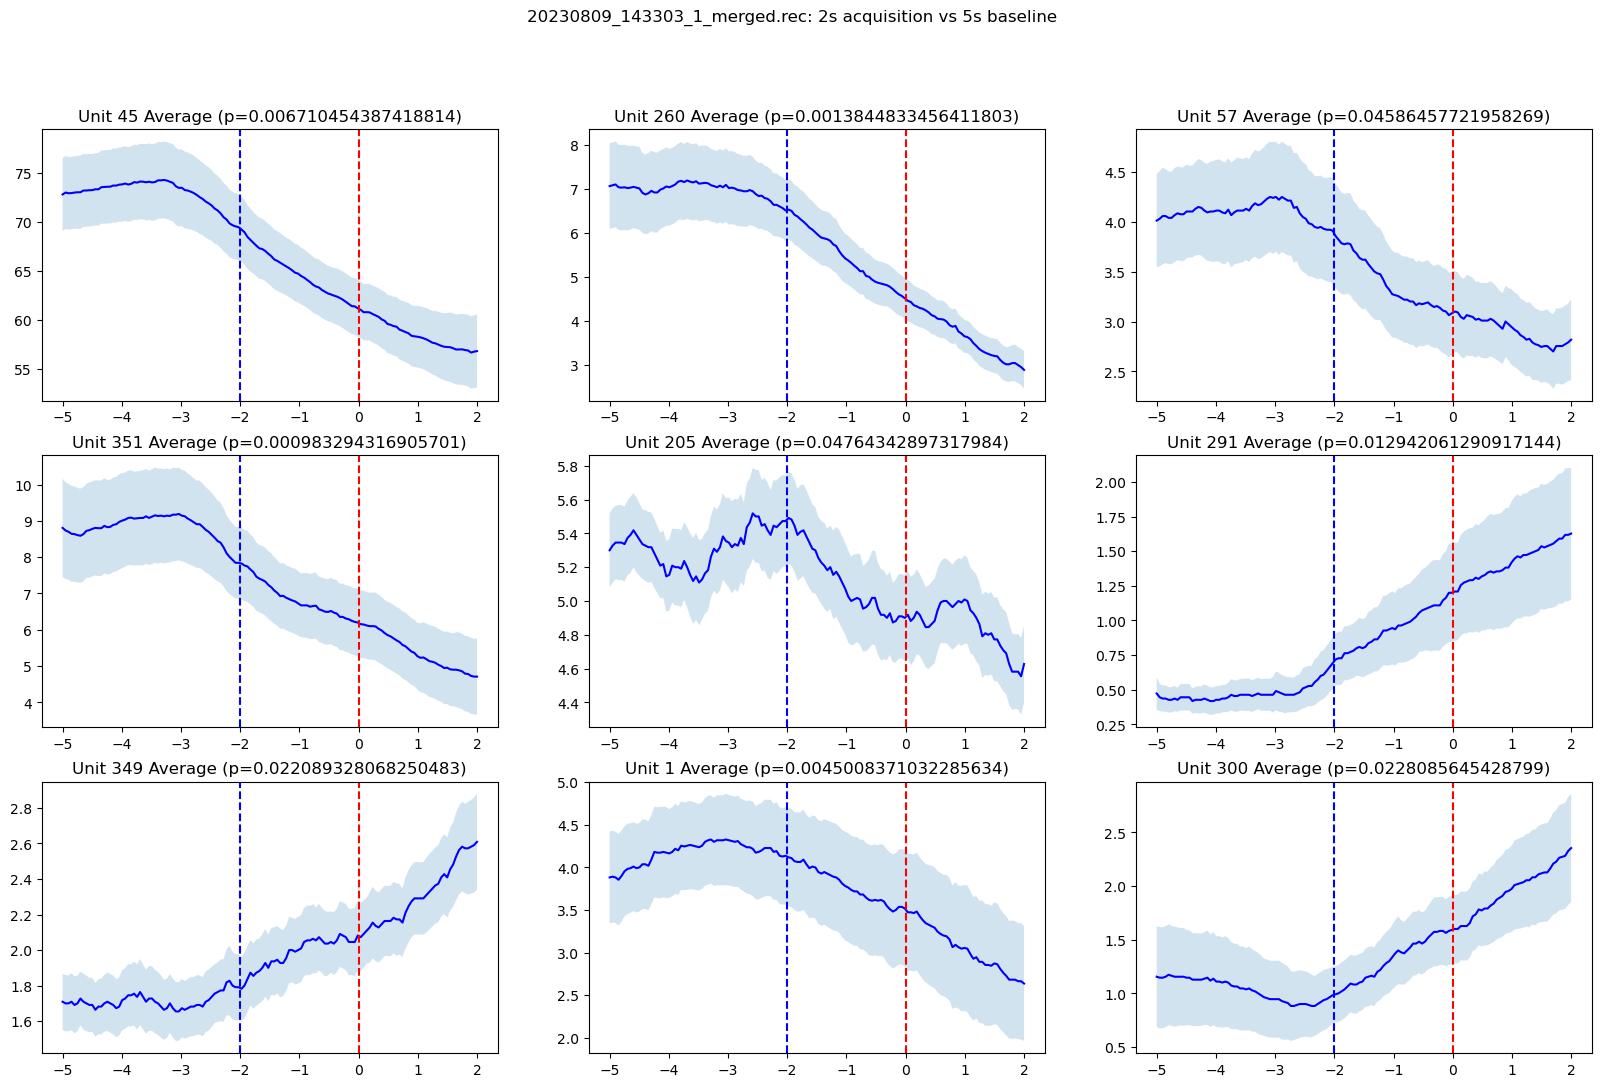

<Figure size 2000x0 with 0 Axes>

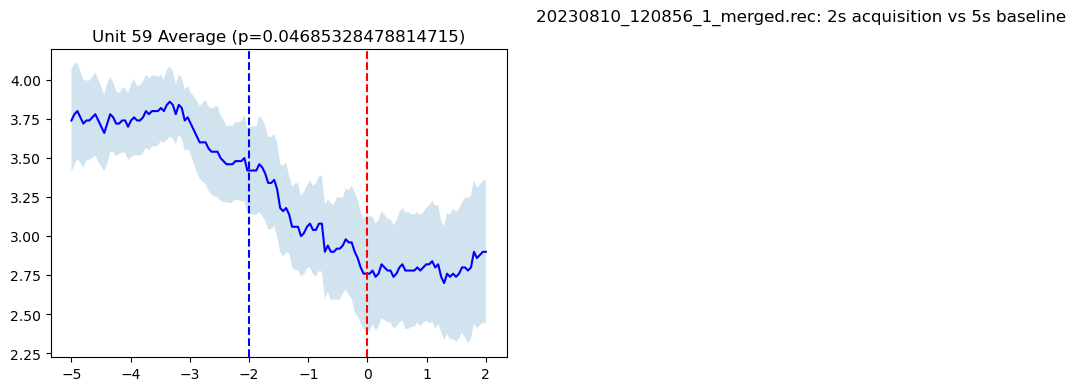

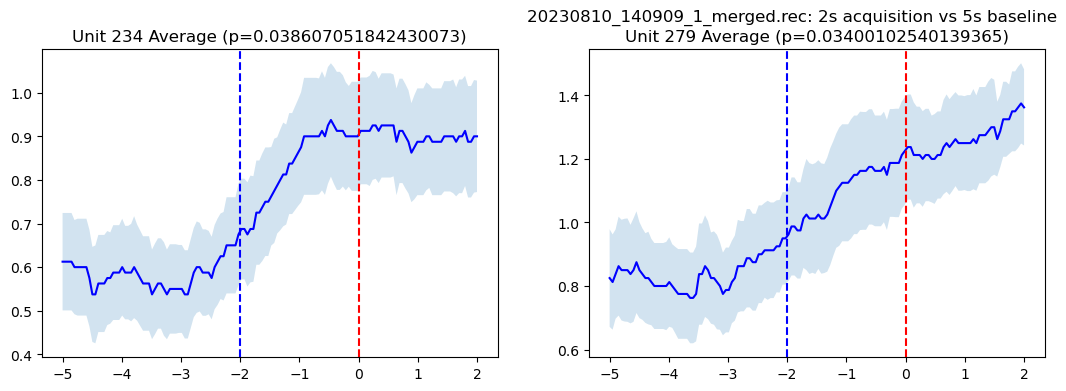

<Figure size 2000x0 with 0 Axes>

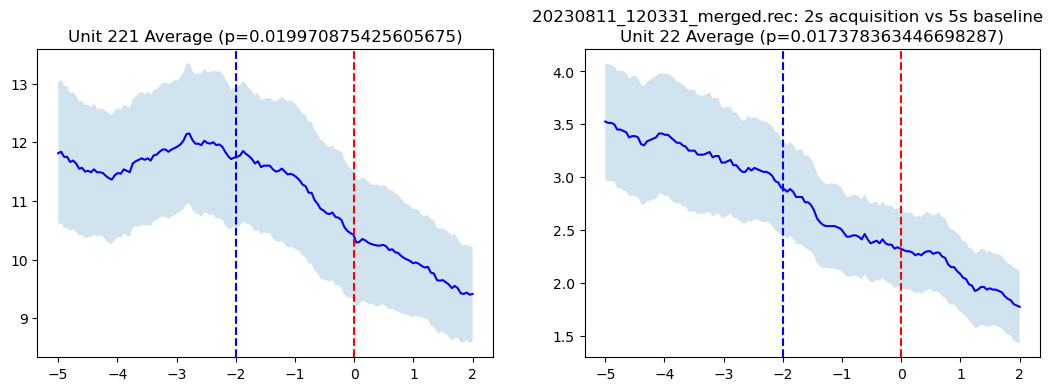

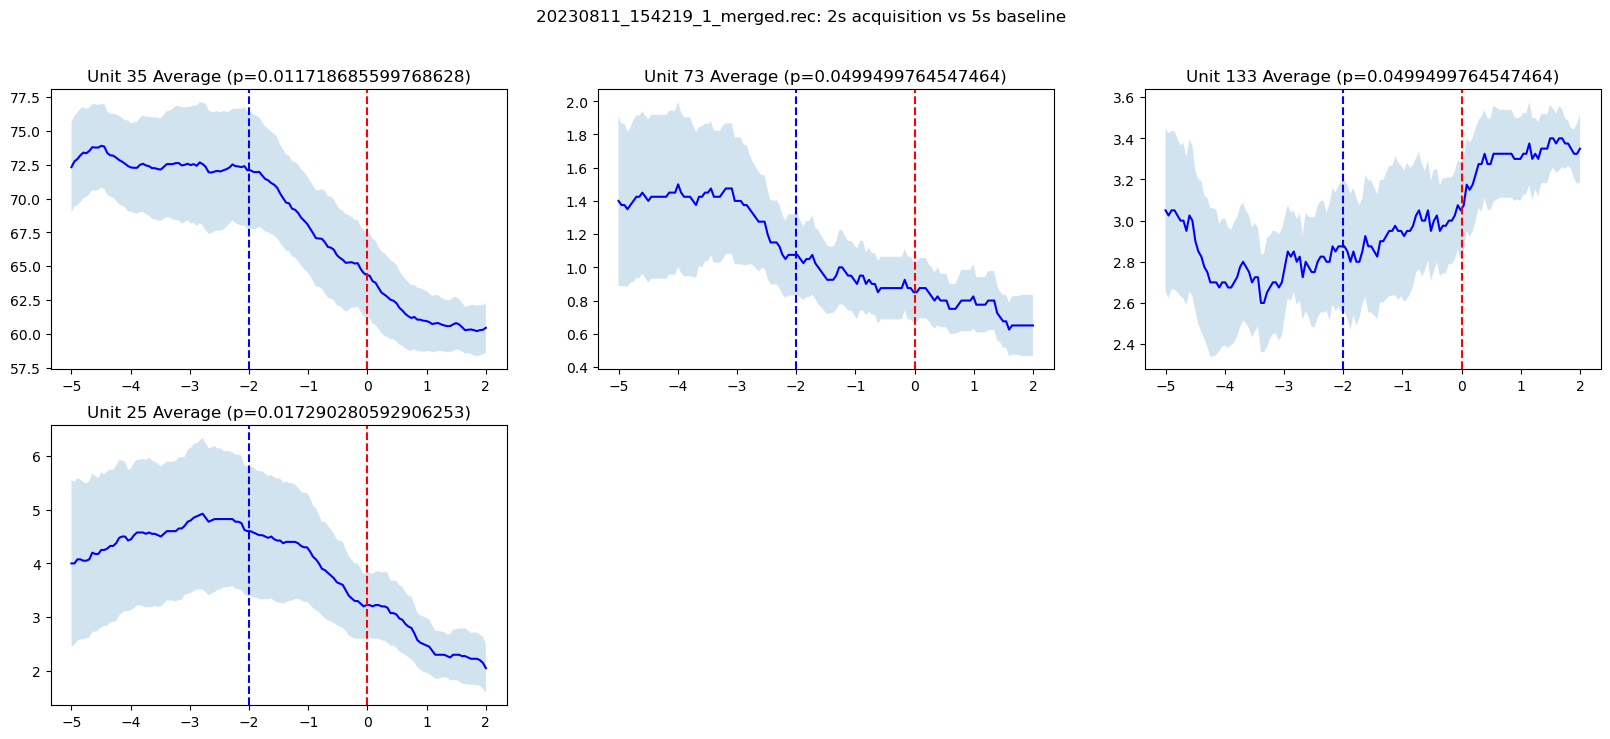

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 293           12.0  0.213524  not significant   
1                  80           15.0  0.374259  not significant   
2                 252            9.0  0.398025  not significant   
3                 211            2.0  0.015156        increases   
4                 276            6.0  0.092892  not significant   
..                ...            ...       ...              ...   
171                76           11.0  0.326989  not significant   
172               149           17.0  0.888638  not significant   
173               135           13.0  0.865772  not significant   
174                38            9.0  0.207578  not significant   
175               136            5.0  0.500184  not significant   

                        Recording Subject                          Event  
0    20230809_103121_1_merged.rec     1.1  2s acquisition vs 5s baseline  
1    20230809_103121_1_merged.rec     1.1  2s acquisition vs 5s baseline  
2    20230809_103121_1_merged.rec     1.1  2s acquisition vs 5s baseline  
3    20230809_103121_1_merged.rec     1.1  2s acquisition vs 5s baseline  
4    20230809_103121_1_merged.rec     1.1  2s acquisition vs 5s baseline  
..                            ...     ...                            ...  
171  20230811_154219_1_merged.rec     1.4  2s acquisition vs 5s baseline  
172  20230811_154219_1_merged.rec     1.4  2s acquisition vs 5s baseline  
173  20230811_154219_1_merged.rec     1.4  2s acquisition vs 5s baseline  
174  20230811_154219_1_merged.rec     1.4  2s acquisition vs 5s baseline  
175  20230811_154219_1_merged.rec     1.4  2s acquisition vs 5s baseline  

[176 rows x 7 columns]

In [ ]:
pca_analysis.wilcox_baseline_v_event_collection('acquisition', 2, 5, -2)

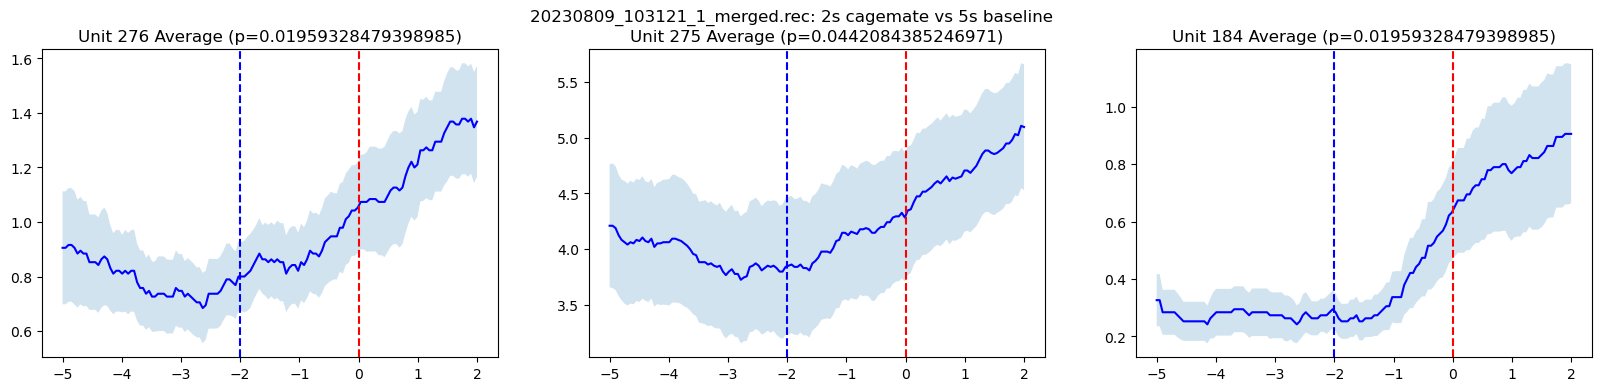

<Figure size 2000x0 with 0 Axes>

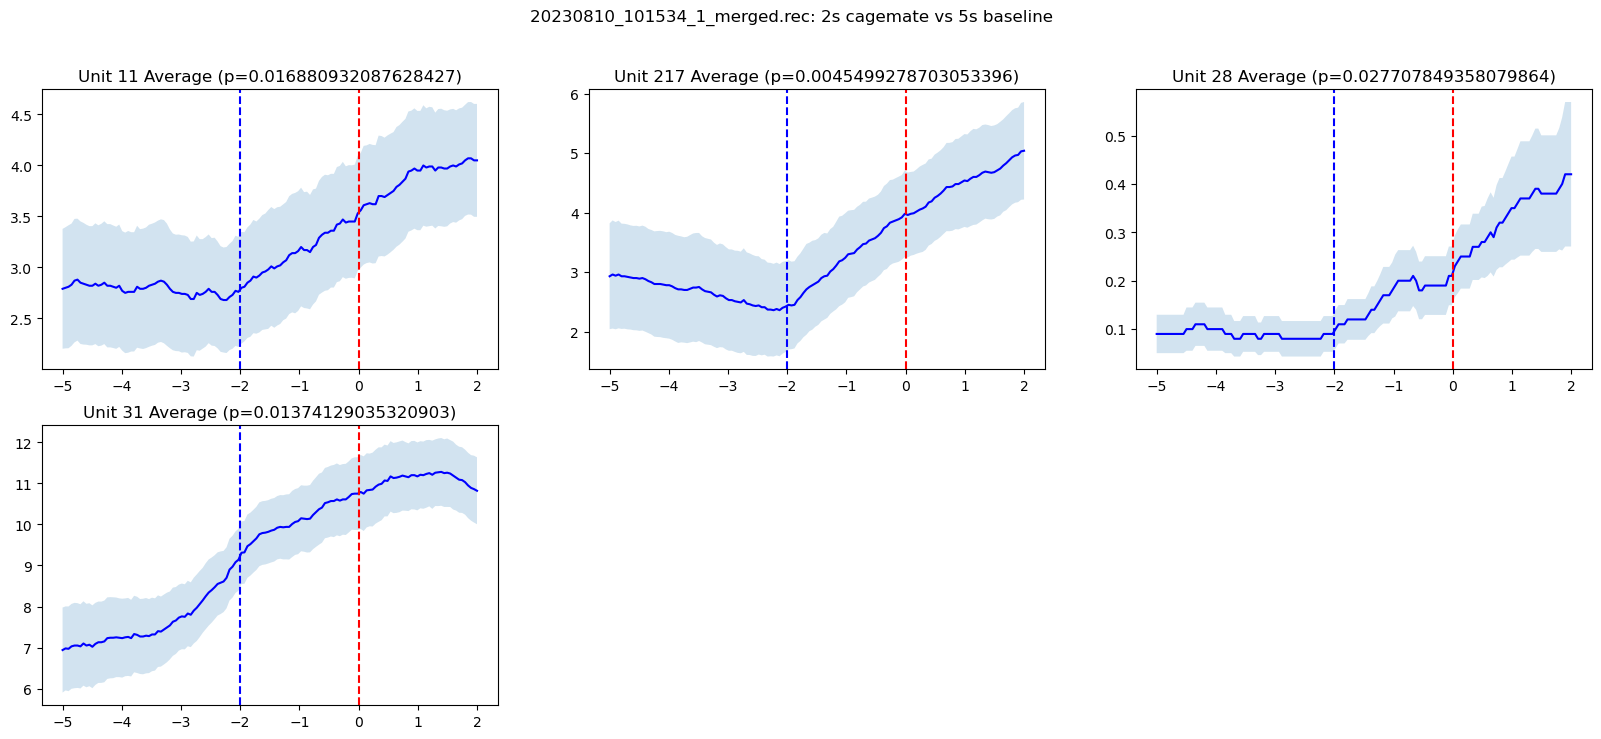

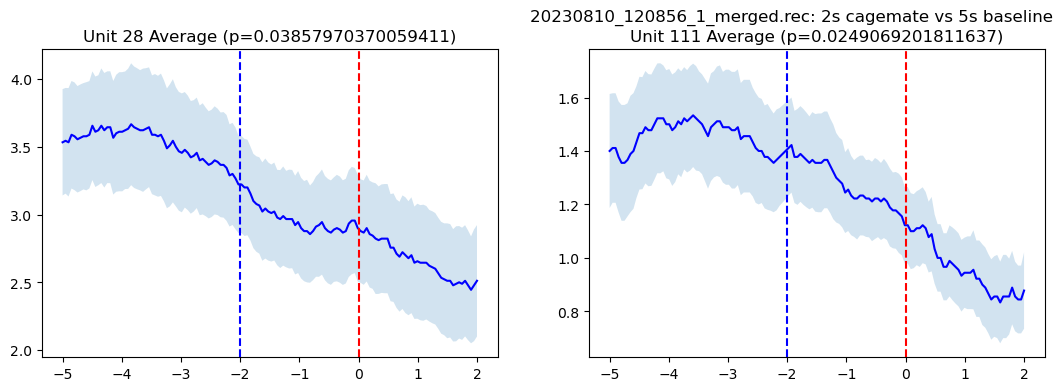

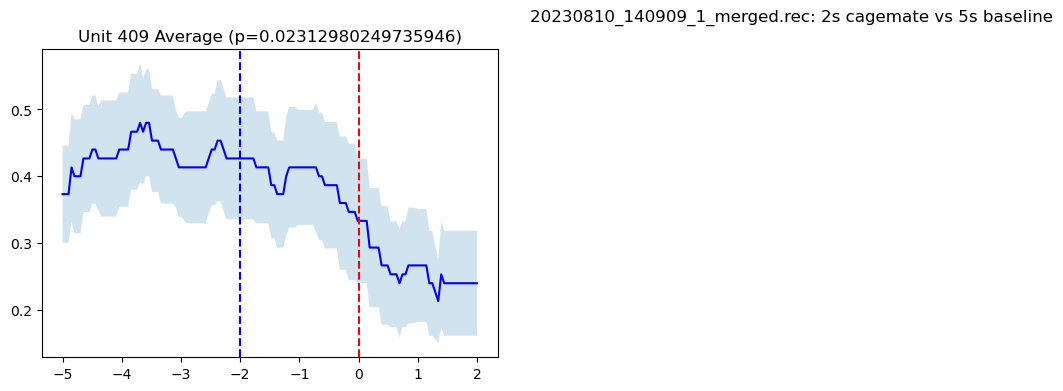

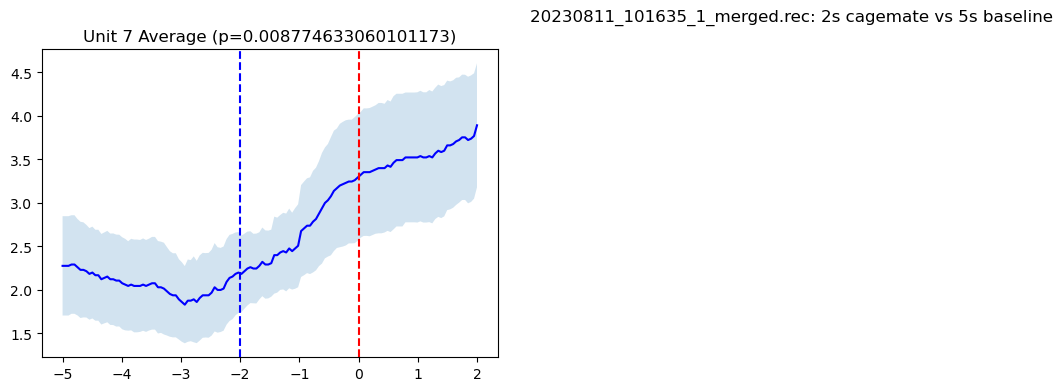

<Figure size 2000x0 with 0 Axes>

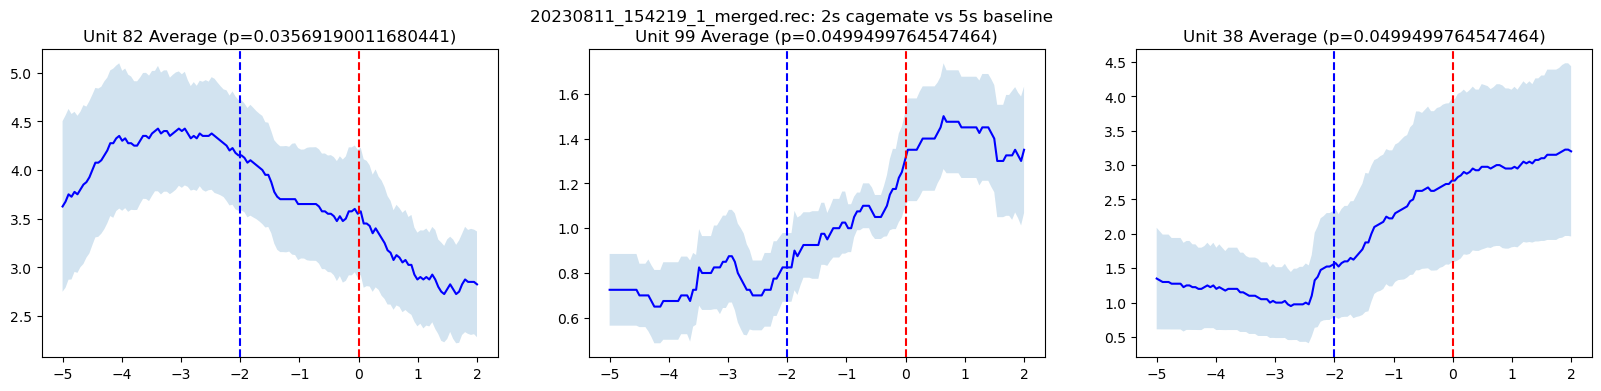

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 293           83.0  0.629162  not significant   
1                  80           92.0  0.903908  not significant   
2                 252           40.0  0.084017  not significant   
3                 211           64.0  0.212211  not significant   
4                 276           37.0  0.019593        increases   
..                ...            ...       ...              ...   
171                76           12.0  0.400814  not significant   
172               149           15.0  0.674424  not significant   
173               135            6.0  0.345448  not significant   
174                38            4.0  0.049950        increases   
175               136           16.0  0.779435  not significant   

                        Recording Subject                       Event  
0    20230809_103121_1_merged.rec     1.1  2s cagemate vs 5s baseline  
1    20230809_103121_1_merged.rec     1.1  2s cagemate vs 5s baseline  
2    20230809_103121_1_merged.rec     1.1  2s cagemate vs 5s baseline  
3    20230809_103121_1_merged.rec     1.1  2s cagemate vs 5s baseline  
4    20230809_103121_1_merged.rec     1.1  2s cagemate vs 5s baseline  
..                            ...     ...                         ...  
171  20230811_154219_1_merged.rec     1.4  2s cagemate vs 5s baseline  
172  20230811_154219_1_merged.rec     1.4  2s cagemate vs 5s baseline  
173  20230811_154219_1_merged.rec     1.4  2s cagemate vs 5s baseline  
174  20230811_154219_1_merged.rec     1.4  2s cagemate vs 5s baseline  
175  20230811_154219_1_merged.rec     1.4  2s cagemate vs 5s baseline  

[176 rows x 7 columns]

In [ ]:
pca_analysis.wilcox_baseline_v_event_collection('cagemate', 2, 5, -2)

In [ ]:
for event in ['novel', 'acquisition', 'cagemate', 'familiar']:    
    pca_analysis.zscore_pre_event(event, 2,5,-2, plot = False, save = True)

In [ ]:
example_novel_cell = phase3_collection.zscored_events['2s novel vs 5s baseline']
example_novel_cell = example_novel_cell[example_novel_cell['original unit id'] == 7]



Recording                    Event Subject  \
121  20230811_101635_1_merged.rec  2s novel vs 5s baseline     1.1   

     original unit id         0         1         2         3         4  \
121                 7 -0.184684 -0.200814 -0.200814 -0.200814 -0.281462   

            5  ...       130       131       132       133       134  \
121 -0.281462  ...  1.621836  1.654095  1.702484  1.702484  1.718614   

          135       136       137       138       139  
121  1.702484  1.718614  1.767003  1.750873  1.734743  

[1 rows x 144 columns]

In [ ]:
example_recall_cell = phase3_collection.zscored_events['2s familiar vs 5s baseline']
example_recall_cell = example_recall_cell[example_recall_cell['original unit id'] == 289]


Recording                       Event Subject  \
11  20230809_143303_1_merged.rec  2s familiar vs 5s baseline     1.4   

    original unit id         0         1         2         3         4  \
11               289 -0.532871 -0.551406 -0.588475 -0.644079 -0.625544   

           5  ...       130       131       132       133       134       135  \
11 -0.625544  ...  1.098178  1.098178  1.098178  1.024039  1.061109  1.135247   

         136       137       138       139  
11  1.061109  1.116712  1.061109  1.042574  

[1 rows x 144 columns]

In [ ]:
example_acquisition_cell = phase3_collection.zscored_events['2s acquisition vs 5s baseline']
example_acquisition_cell = example_acquisition_cell[example_acquisition_cell['original unit id'] == 234]
example_acquisition_cell

Recording                          Event Subject  \
108  20230810_140909_1_merged.rec  2s acquisition vs 5s baseline     1.4   

     original unit id         0         1         2         3        4  \
108               234 -1.632532 -1.632532 -1.632532 -1.632532 -1.73343   

           5  ...       130       131       132       133       134       135  \
108 -1.73343  ...  0.688125  0.688125  0.587227  0.688125  0.688125  0.789024   

          136       137       138       139  
108  0.587227  0.587227  0.688125  0.688125  

[1 rows x 144 columns]

In [ ]:
example_cagemate_cell = phase3_collection.zscored_events['2s cagemate vs 5s baseline']
example_cagemate_cell = example_cagemate_cell[example_cagemate_cell['original unit id'] == 11]
example_cagemate_cell

Recording                       Event Subject  \
51  20230810_101534_1_merged.rec  2s cagemate vs 5s baseline     1.1   

    original unit id        0         1        2        3        4         5  \
51                11 -1.19285 -1.171985 -1.15112 -1.10939 -1.02593 -1.005065   

    ...       130      131       132       133      134       135       136  \
51  ...  1.310945  1.33181  1.310945  1.352675  1.37354  1.436135  1.477865   

         137       138       139  
51  1.477865  1.436135  1.436135  

[1 rows x 144 columns]

In [ ]:
x_axis = np.linspace(-5, 2, 140)
x_df = pd.DataFrame(x_axis)

In [ ]:
example_cells_phase3 = pd.concat([example_novel_cell, example_recall_cell, example_cagemate_cell, example_acquisition_cell, x_df])
example_cells_phase3.to_excel('example_phase3cells_withaxis.xlsx')